# Analyze full set of snippet predictions

### Note: about a quarter of the way through we start using a multi-index/multi-column view of the data that is much easier to manipulate.

In [2]:
%matplotlib inline

In [556]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from copy import copy
import datetime

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# set the matplotlib style and size (yes I need both these styles, in this order)
plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')

# Matplotlib figure settings
# size designed to allow two to fit one above another in the margins of a page, scaling enough to have nice graphs but not too much to make the fonts tiny
plt.rcParams["figure.figsize"] = (9.6, 6) 
#plt.rcParams["figure.figsize"] = (13,10) # a good width to view in jupyter
plt.rcParams['font.sans-serif'] = ["Montserrat", "Roboto", "DejaVu Sans", "Calibri"] #["Linux Biolinum"]
plt.rcParams['font.serif'] = ["Charis SIL"] # this isn't really used I don't think

from common import *

# these are the classifiers we actually ran
Classifiers = ['label_category', 'label_usforeign', 'factinvestigative', 'label_tone', 'label_emotion']

# this contains the labels for each classifier
label_set = Labels.copy()
label_set['factinvestigative'] = ['investigative', 'noninvestigative', 'opinion', 'other']

Note: Data available in sufficient quanty for dates (inclusive):
 - ALJAZAM    2012-07 - 2016-01
 - CNBC       2012-01 +
 - Bloomberg  2013-10 + 
 - FBC        2012-07 +
 - NPR        2010-01 - 2015-10  (2016 missing)

In [4]:
# possible visualization options
import matplotlib 
matplotlib.style.available

['seaborn-darkgrid',
 'Solarize_Light2',
 'seaborn-notebook',
 'classic',
 'seaborn-ticks',
 'grayscale',
 'bmh',
 'seaborn-talk',
 'dark_background',
 'ggplot',
 'fivethirtyeight',
 '_classic_test',
 'seaborn-colorblind',
 'seaborn-deep',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-poster',
 'seaborn-muted',
 'seaborn-paper',
 'seaborn-white',
 'fast',
 'seaborn-pastel',
 'seaborn-dark',
 'tableau-colorblind10',
 'seaborn',
 'seaborn-dark-palette']

A little config first

In [5]:
results_path = Path('results/classification_results')

In [6]:
clas_name = 'label_tone'
n_clas_cols = len(label_set[clas_name])

## First clean up an error in the output
The overall_sums by top-k frequency by class are not converted to percentages like all the other classes

FOR pre-20190401 ONLY!

In [5]:
#df = pd.read_csv(results_path/(clas_name+'_stats.csv'))

In [6]:
#df.to_csv(results_path/(clas_name+'_stats-corrected.csv'), index=False)

In [ ]:
# Fix the error for each file (combining all the above)
for clas_name in Classifiers:
    n_clas_cols = len(label_set[clas_name])
    df = pd.read_csv(results_path/(clas_name+'_stats.csv'))
    # the overall sum for top-k was errantly NOT converted to a fraction; let's convert it for consistency
    overall_sum_col = list(df.columns).index('overall-sum-top_k')
    assert(overall_sum_col)
    print(df.iloc[:,overall_sum_col:overall_sum_col+n_clas_cols+1].head())
    for class_col in range(n_clas_cols):
        i_col = overall_sum_col+class_col+1
        df.iloc[:,i_col] = (df.iloc[:,i_col] / df.iloc[:,overall_sum_col])   
    print(df.iloc[:,overall_sum_col:overall_sum_col+n_clas_cols+1].head())
    df.to_csv(results_path/(clas_name+'_stats-corrected.csv'), index=False)

## Sometimes it's easier to work in the original counts/sums
Here we convert back to that and save in a 'counts' file

In [4]:
# convert all fraction columns back to counts/sums
for clas_name in Classifiers:
    n_clas_cols = len(label_set[clas_name])
    df = pd.read_csv(results_path/(clas_name+'_stats.csv')) # NOTE: -corrected.csv for pre-20190401
    halfwaypoint = list(df.columns).index('overall-sum-top_k') # since there's the quarter date, the halves arent equal
    total_col = 1
    while total_col < len(df.columns):
        # the overall sum for top-k was errantly NOT converted to a fraction (so don't unconvert it)
        #if df.columns[total_col] != 'overall-sum-top_k':
        for class_col in range(n_clas_cols):
            i_col = total_col+class_col+1
            col = (df.iloc[:,total_col] * df.iloc[:,i_col])
            if total_col < halfwaypoint:
                df.iloc[:,i_col] = col.round().astype(np.int32)
            else:
                # the second half are top-k and float sums are expected
                df.iloc[:,i_col] = col
        total_col += n_clas_cols + 1
    df.to_csv(results_path/(clas_name+'_stats-counts.csv'), index=False)

## Some playing around and testing

In [10]:
label_set['label_category']

['transitions',
 'elections_hard',
 'elections_soft',
 'business_economics',
 'science_tech',
 'government',
 'entertainment',
 'sports',
 'weather',
 'products',
 'anecdotes',
 'current_events',
 'cultural',
 'ads',
 'none']

In [47]:
drop_labels = ['transitions', 'ads', 'none']
drop_label_indices = [label_set['label_category'].index(l) for l in drop_labels]
drop_label_indices

[0, 13, 14]

In [50]:
df.head()

,quarter_begin_date,overall-total,overall-transitions,overall-elections_hard,overall-elections_soft,overall-business_economics,overall-science_tech,overall-government,overall-entertainment,overall-sports,overall-weather,overall-products,overall-anecdotes,overall-current_events,overall-cultural,overall-ads,overall-none,CNN-total,CNN-transitions,CNN-elections_hard,CNN-elections_soft,CNN-business_economics,CNN-science_tech,CNN-government,CNN-entertainment,CNN-sports,CNN-weather,CNN-products,CNN-anecdotes,CNN-current_events,CNN-cultural,CNN-ads,CNN-none,CNBC-total,CNBC-transitions,CNBC-elections_hard,CNBC-elections_soft,CNBC-business_economics,CNBC-science_tech,CNBC-government,CNBC-entertainment,CNBC-sports,CNBC-weather,CNBC-products,CNBC-anecdotes,CNBC-current_events,CNBC-cultural,CNBC-ads,CNBC-none,ALJAZAM-total,ALJAZAM-transitions,ALJAZAM-elections_hard,ALJAZAM-elections_soft,ALJAZAM-business_economics,ALJAZAM-science_tech,ALJAZAM-government,ALJAZAM-entertainment,ALJAZAM-sports,ALJAZAM-weather,ALJAZAM-products,ALJAZAM-anecdotes,ALJAZAM-current_events,ALJAZAM-cultural,ALJAZAM-ads,ALJAZAM-none,BLOOMBERG-total,BLOOMBERG-transitions,BLOOMBERG-elections_hard,BLOOMBERG-elections_soft,BLOOMBERG-business_economics,BLOOMBERG-science_tech,BLOOMBERG-government,BLOOMBERG-entertainment,BLOOMBERG-sports,BLOOMBERG-weather,BLOOMBERG-products,BLOOMBERG-anecdotes,BLOOMBERG-current_events,BLOOMBERG-cultural,BLOOMBERG-ads,BLOOMBERG-none,MSNBC-total,MSNBC-transitions,MSNBC-elections_hard,MSNBC-elections_soft,MSNBC-business_economics,MSNBC-science_tech,MSNBC-government,MSNBC-entertainment,MSNBC-sports,MSNBC-weather,MSNBC-products,MSNBC-anecdotes,MSNBC-current_events,MSNBC-cultural,MSNBC-ads,MSNBC-none,FOXNEWS-total,FOXNEWS-transitions,FOXNEWS-elections_hard,FOXNEWS-elections_soft,FOXNEWS-business_economics,FOXNEWS-science_tech,FOXNEWS-government,FOXNEWS-entertainment,FOXNEWS-sports,FOXNEWS-weather,FOXNEWS-products,FOXNEWS-anecdotes,FOXNEWS-current_events,FOXNEWS-cultural,FOXNEWS-ads,FOXNEWS-none,FBC-total,FBC-transitions,FBC-elections_hard,FBC-elections_soft,FBC-business_economics,FBC-science_tech,FBC-government,FBC-entertainment,FBC-sports,FBC-weather,FBC-products,FBC-anecdotes,FBC-current_events,FBC-cultural,FBC-ads,FBC-none,PBS-total,PBS-transitions,PBS-elections_hard,PBS-elections_soft,PBS-business_economics,PBS-science_tech,PBS-government,PBS-entertainment,PBS-sports,PBS-weather,PBS-products,PBS-anecdotes,PBS-current_events,PBS-cultural,PBS-ads,PBS-none,ABC-total,ABC-transitions,ABC-elections_hard,ABC-elections_soft,ABC-business_economics,ABC-science_tech,ABC-government,ABC-entertainment,ABC-sports,ABC-weather,ABC-products,ABC-anecdotes,ABC-current_events,ABC-cultural,ABC-ads,ABC-none,NBC-total,NBC-transitions,NBC-elections_hard,NBC-elections_soft,NBC-business_economics,NBC-science_tech,NBC-government,NBC-entertainment,NBC-sports,NBC-weather,NBC-products,NBC-anecdotes,NBC-current_events,NBC-cultural,NBC-ads,NBC-none,CBS-total,CBS-transitions,CBS-elections_hard,CBS-elections_soft,CBS-business_economics,CBS-science_tech,CBS-government,CBS-entertainment,CBS-sports,CBS-weather,CBS-products,CBS-anecdotes,CBS-current_events,CBS-cultural,CBS-ads,CBS-none,NPR-total,NPR-transitions,NPR-elections_hard,NPR-elections_soft,NPR-business_economics,NPR-science_tech,NPR-government,NPR-entertainment,NPR-sports,NPR-weather,NPR-products,NPR-anecdotes,NPR-current_events,NPR-cultural,NPR-ads,NPR-none,BBC-total,BBC-transitions,BBC-elections_hard,BBC-elections_soft,BBC-business_economics,BBC-science_tech,BBC-government,BBC-entertainment,BBC-sports,BBC-weather,BBC-products,BBC-anecdotes,BBC-current_events,BBC-cultural,BBC-ads,BBC-none,overall-sum-top_k,overall-transitions-top_k,overall-elections_hard-top_k,overall-elections_soft-top_k,overall-business_economics-top_k,overall-science_tech-top_k,overall-government-top_k,overall-entertainment-top_k,overall-sports-top_k,overall-weather-top_k,overall-products-top_k,overall-anecdotes-top_k,overall-current_events-top_k,overal

In [11]:
# narrow down to only the summary count rows
df = df.iloc[:,:n_clas_cols+2]

In [66]:
df.head()

,quarter_begin_date,overall-total,overall-transitions,overall-elections_hard,overall-elections_soft,overall-business_economics,overall-science_tech,overall-government,overall-entertainment,overall-sports,overall-weather,overall-products,overall-anecdotes,overall-current_events,overall-cultural,overall-ads,overall-none
0,2010-01-01,629380,43859,1058,28156,85495,12009,178857,29258,11155,16646,6327,44358,86065,21843,61409,2885
1,2010-04-01,532573,36614,642,20165,67698,17239,130413,26575,9269,10056,6195,44004,80508,22538,58341,2316
2,2010-07-01,697109,47321,1949,47261,37838,18840,188408,33215,10552,17009,7752,57654,104343,40313,81554,3100
3,2010-10-01,740172,50714,2078,67565,39507,15481,203887,43724,10895,17245,10259,66201,89214,32436,87136,3830
4,2011-01-01,746948,46795,1128,28866,38937,18259,217652,37272,10387,17157,7284,55732,144338,32563,87569,3009


In [74]:
list(df.columns).index('overall-government')

7

### Some configuration settings for matplotlib line plots

In [501]:
# use markers for each data point
from itertools import cycle
markers = list('X.ov^<>p*PdDs')
def setPlotMarkers(ax):
    for line, marker in zip(ax.get_lines(), cycle(markers)):
        line.set_marker(marker)

In [502]:
import matplotlib.dates as mdates
def configureLinePlot(ax, ylabel='', xlabel='', legendPos='above',useMarkers=True):
    setPlotMarkers(ax)
    ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3)) # minor ticks every quarter
    ax.set_xlim(left=pd.to_datetime('2010-01-01'), right=pd.to_datetime('2016-12-31'))
    ax.tick_params(which='minor', length=2) # show
    # for legend position, see https://stackoverflow.com/a/43439132
    if legendPos=='above':
        ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=4) # above
    elif legendPos=='right':
        ax.legend(bbox_to_anchor=(1.04,1), loc="upper left", fancybox=True, frameon=True, shadow=True) # right side
    else: #'best'
        ax.legend() # still need to call to update markers
    ax.set(xlabel=xlabel, ylabel=ylabel)

## Gather the applicable overall sums for this classifier and plot them over time (first with, then without useless columns)

The applicable sums are top-k for all the classifiers except factinvestigative

Note, some of this is "the hard way". See below for easier approaches using multi-index/multi-column views of the data

In [503]:
clas_name = 'label_category'
n_clas_cols = len(label_set[clas_name])

In [504]:
df = pd.read_csv(results_path/(clas_name+'_stats.csv'))

In [505]:
# Default to using top-k classifier results
overall_sum_col = list(df.columns).index('overall-sum-top_k')

if clas_name == 'factinvestigative':
    # use top 1 for this classifier
    overall_sum_col = 1

In [506]:
# save only the (applicable) overall summary columns
df_overall_trends = df.iloc[:,overall_sum_col+1:overall_sum_col+n_clas_cols+1]
# set the date index of the data points to be offset to the middle of the quarter
df_overall_trends = df_overall_trends.set_index(pd.DatetimeIndex(df['quarter_begin_date']) +  pd.DateOffset(45))
if overall_sum_col != 1:
    # remove '-top_k'
    df_overall_trends.columns = [col_name[8:-6] for col_name in df_overall_trends.columns]

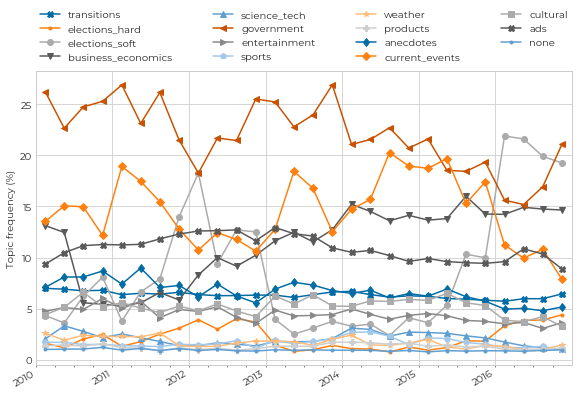

In [507]:
import matplotlib.dates as mdates
ax = (df_overall_trends * 100.0).plot()
setPlotMarkers(ax)
configureLinePlot(ax, 'Topic frequency (%)')
plt.savefig(str(results_path/('fig_'+clas_name+'-overall-overtime.pdf')), bbox_inches='tight', pad_inches=0)

#### See below for overall for non-business stations most of which have complete data)

In [508]:
# remove useless categories and renormalize frequencies on remaining ones
if clas_name == 'label_category':
    drop_labels = ['transitions', 'ads', 'none']
    #drop_indices = [label_set['label_category'].index(l) for l in drop_labels]
    drop_mask = np.array([True if l in drop_labels else False for l in label_set['label_category']])
    #print(drop_mask)
    dropped = df_overall_trends.iloc[:,drop_mask]
    scale_factor = 1.0 / (1.0 - dropped.sum(axis=1))
    #print(scale_factor)
    df_overall_trends_relevant = df_overall_trends.iloc[:,~drop_mask].copy()
    #print(df_overall_trends_relevant.head())
    for cn in df_overall_trends_relevant.columns:
        df_overall_trends_relevant[cn] = scale_factor * df_overall_trends_relevant[cn]
    
    print(df_overall_trends_relevant.sum(axis=1))

quarter_begin_date
2010-02-15    1.0
2010-05-16    1.0
2010-08-15    1.0
2010-11-15    1.0
2011-02-15    1.0
2011-05-16    1.0
2011-08-15    1.0
2011-11-15    1.0
2012-02-15    1.0
2012-05-16    1.0
2012-08-15    1.0
2012-11-15    1.0
2013-02-15    1.0
2013-05-16    1.0
2013-08-15    1.0
2013-11-15    1.0
2014-02-15    1.0
2014-05-16    1.0
2014-08-15    1.0
2014-11-15    1.0
2015-02-15    1.0
2015-05-16    1.0
2015-08-15    1.0
2015-11-15    1.0
2016-02-15    1.0
2016-05-16    1.0
2016-08-15    1.0
2016-11-15    1.0
dtype: float64


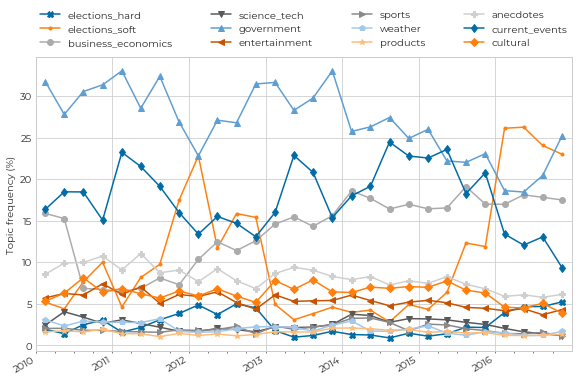

In [510]:
ax = (df_overall_trends_relevant * 100.0).plot()
configureLinePlot(ax, 'Topic frequency (%)')
plt.savefig(str(results_path/('fig_'+clas_name+'-overall-overtime.pdf')), bbox_inches='tight', pad_inches=0) #overwrites previous

# NOTE: this is _snippet_-weighted overall averages, and includes business stations

## Show Bar charts of network breakdowns (overall frequencies)

In [511]:
def addLabels_barh(ax, nbars=None, formatstr="{:.1f}%"):
    '''add data labels to each bar segment with the given formatting. If the number of bars is specified, it right-aligns the last labels'''
    #x_offset = 0#-0.03
    y_offset = 0.12
    for i, p in enumerate(ax.patches):
        b = p.get_bbox()
        val = formatstr.format(b.width) 
        #ax.annotate(val, (p.get_x() * .9955 + p.get_width(), p.get_y() * 1.005))
        xloc = (b.x0 + b.x1)/2
        ha='center'
        if nbars and i >= len(ax.patches) - nbars:
            # these are the last stacked (rightmost) elements for each bar
            xloc = b.x1
            ha = 'right'
        elif b.x0 == 0.0:
            xloc = 0
            ha = 'left' #horizontal alignment (where the location coordinate is within the text box)

        ax.annotate(val, (xloc, b.y1 + y_offset), ha=ha, fontsize=10) # b.y0 not b.y1 for overlaid instead of on top

In [512]:
clas_name = 'label_category'
n_clas_cols = len(label_set[clas_name])

In [513]:
df = pd.read_csv(results_path/(clas_name+'_stats-counts.csv'))

In [514]:
halfwaypoint = list(df.columns).index('overall-sum-top_k')

if clas_name == 'factinvestigative':
    # use top 1
    df.drop(df.columns[halfwaypoint:], axis=1, inplace=True)
    summary_col = 'total'
else:
    # use top k
    df.drop(df.columns[1:halfwaypoint], axis=1, inplace=True)
    summary_col = 'sum'

In [515]:
# get sums for each column and clean things up into a dataframe
sums = df.sum(axis=0)
sums = pd.DataFrame(sums, columns=['sum'])
sums['name'] = sums.index
sums = sums.reset_index()
sums = sums.drop([0]) #remove quarter begin date
sums = sums.drop(columns = ['index'])
sums.head()

,sum,name
1,3.19167e+07,overall-sum-top_k
2,2.00857e+06,overall-transitions-top_k
3,709899,overall-elections_hard-top_k
4,2.92572e+06,overall-elections_soft-top_k
5,3.72103e+06,overall-business_economics-top_k


In [516]:
# split the rows names (previous column names) into separate columns
new_cols = sums['name'].str.split('-', expand=True)
sums['network'] = new_cols[0]
sums['class'] = new_cols[1]
del sums['name']
sums.head()

,sum,network,class
1,3.19167e+07,overall,sum
2,2.00857e+06,overall,transitions
3,709899,overall,elections_hard
4,2.92572e+06,overall,elections_soft
5,3.72103e+06,overall,business_economics


In [517]:
sums = sums.pivot(index='network', columns='class', values='sum')
sums.head()
remaining_labels = copy(label_set[clas_name])

class          ads     none transitions
network                                
ABC         192590  18309.3      117013
ALJAZAM    21837.5  6807.01     95598.5
BBC        15979.7  625.464     10971.2
BLOOMBERG  7813.12  6228.83     87353.1
CBS         132993  8732.58       63121
CNBC        207783    24373      158968
CNN         882484    48637      388688
FBC         220080  13310.9      112049
FOXNEWS     764107  75303.5      451326
MSNBC       833475  34968.3      329086
NBC         207007  38825.5      124179
NPR        2444.84   4164.6     16402.5
PBS        17836.5    11432     53814.6


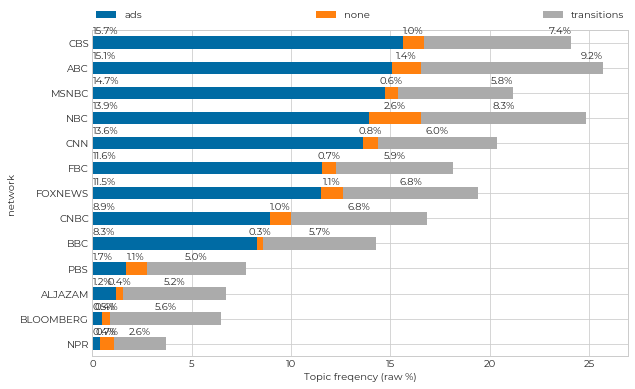

In [518]:
# remove useless categories and renormalize frequencies on remaining ones
# save bar chart of categories we're dropping
if clas_name == 'label_category':
    drop_labels = ['transitions', 'ads', 'none']
    #drop_indices = [label_set['label_category'].index(l) for l in drop_labels]
    drop_mask = np.array([True if l in drop_labels else False for l in sums.columns])
    #print(drop_mask)
    dropped = sums.iloc[:,drop_mask]
    dropped_counts = dropped.sum(axis=1)
    #scale_factor = 1.0 / (1.0 - dropped.sum(axis=1))
    #print(scale_factor)
    sums = sums.iloc[:,~drop_mask].copy()
    
    dropped_freqs = dropped.copy()
    dropped_freqs = dropped_freqs.drop('overall') # this overall summary would be snippet-weighted, not station-weighted, so easier to drop it.
    print(dropped_freqs)
    for label in dropped_freqs.columns:
        dropped_freqs[label] = dropped[label] / sums[summary_col]
    dropped_freqs = dropped_freqs * 100.0  # make pcts
    dropped_freqs = dropped_freqs.sort_values('ads')
    ax = dropped_freqs.plot.barh(stacked=True)
    ax.set(xlabel='Topic freqency (raw %)')
    addLabels_barh(ax, nbars=len(dropped_freqs.columns))
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=4) # above
    plt.savefig(str(results_path/('fig_'+clas_name+'dropped-barh.pdf')), bbox_inches='tight', pad_inches=0)

#     for cn in sums.columns:
#         sums[cn] = scale_factor * sums[cn]
    sums[summary_col] -= dropped_counts
    
    for l in drop_labels:
        remaining_labels.remove(l)

In [519]:
print(remaining_labels)

['elections_hard', 'elections_soft', 'business_economics', 'science_tech', 'government', 'entertainment', 'sports', 'weather', 'products', 'anecdotes', 'current_events', 'cultural']


In [520]:
freqs = sums.copy()
for label in remaining_labels:
    freqs[label] = freqs[label] / freqs[summary_col]
freqs = freqs.drop('overall') # this overall summary would be snippet-weighted, not station-weighted, so easier to drop it.
freqs *= 100.0  # make them percents actually
freqs

class,anecdotes,business_economics,cultural,current_events,elections_hard,elections_soft,entertainment,government,products,science_tech,sports,sum,weather
network,,,,,,,,,,,,,
ABC,16.6462,4.42704,4.504,26.2094,0.923001,4.80842,14.2557,9.77092,3.51918,3.04355,4.3745,9.48822e+07,7.51807
ALJAZAM,5.99019,6.00255,9.72151,32.2619,0.704244,2.31252,2.79874,28.9006,0.876015,5.53273,3.15855,1.7278e+08,1.74048
BBC,5.46769,5.52309,6.16402,39.7094,0.795108,3.19637,3.74839,28.3322,0.61625,4.06679,1.95123,1.65865e+07,0.429448
BLOOMBERG,4.08258,52.512,3.18139,5.02114,1.55619,5.4913,4.76537,16.4448,2.26869,2.8496,1.69742,1.46095e+08,0.129456
CBS,12.934,6.51445,5.69965,23.391,1.27552,5.81764,10.2842,16.0904,2.73613,4.2765,4.27403,6.44738e+07,6.70647
CNBC,4.45431,67.2848,1.51241,3.20677,1.07554,2.21147,2.32837,11.7843,2.92329,1.70527,1.13652,1.93159e+08,0.376941
CNN,9.53168,4.68342,6.94012,26.1857,2.65656,12.1007,5.52334,24.8027,0.871934,2.43417,1.9937,5.15922e+08,2.27592
FBC,4.40358,29.1583,5.90741,7.59248,3.18034,12.0984,2.61681,29.1024,2.02818,1.89261,1.48895,1.5554e+08,0.530528
FOXNEWS,7.87102,5.34656,7.35637,17.9464,3.36012,14.2573,4.21039,33.9385,1.11667,1.57441,1.47382,5.35266e+08,1.54841


In [521]:
sums = sums.drop('overall')
sums=sums.sort_values(summary_col, ascending=True)

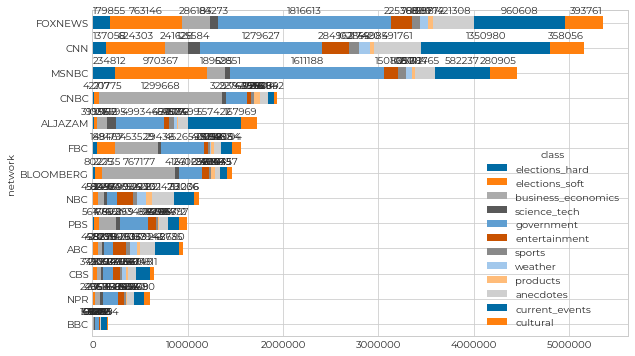

In [522]:
ax = sums.plot.barh(y=remaining_labels, stacked=True)
# for i, v in enumerate(sums['sum']):
#     ax.text(v, i, '{:.2f}%'.format(100*v))
addLabels_barh(ax, nbars=len(sums.index), formatstr='{:.0f}')

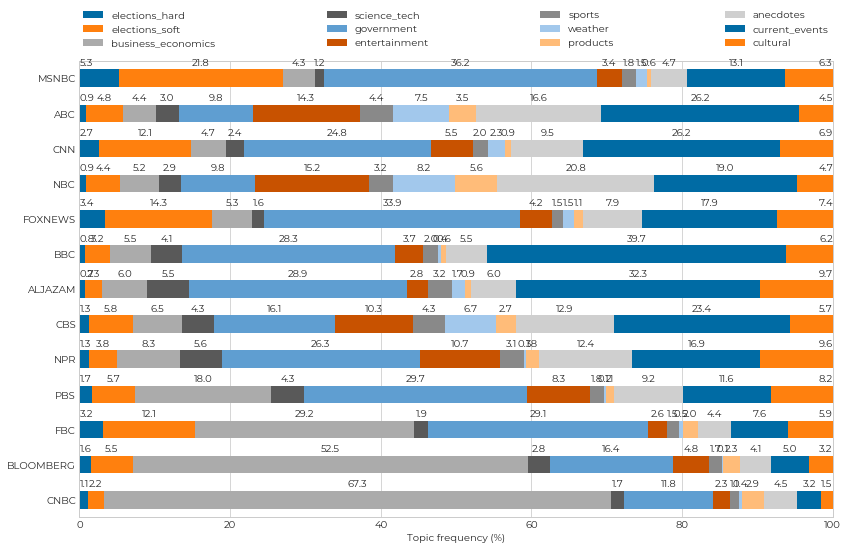

In [523]:
figsize = (4.5,6.5)
ncols = 2
xlab = "Class frequency (%)"
if clas_name == 'label_category':
    figsize = (13.5, 8.4)
    ncols = 4
    xlab = "Topic frequency (%)"
    
freqs = freqs.sort_values('business_economics', ascending=False) # they are plotted in reverse of this
ax = freqs.plot.barh(stacked=True, y=remaining_labels, figsize=figsize) #y=['negative', 'neutral', 'positive'])
addLabels_barh(ax, nbars=len(sums.index), formatstr='{:.1f}')
ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=ncols) # above (col=2 for suppl cats)
ax.set(xlabel=xlab, ylabel='')
ax.set_xlim(right=100.0)
#ax.xaxis.set_major_locator(plt.NullLocator())
#ax.yaxis.set_major_locator(plt.NullLocator())
plt.savefig(str(results_path/('fig_'+clas_name+'-barh.pdf')), bbox_inches='tight', pad_inches=0)

In [525]:
# write summary table for inclusion in paper
label_table = freqs.sort_index() #.drop(columns='total') # 'total
with open(str(results_path/('tbl_'+clas_name+'-by_station.tex')), 'w') as f:
    label_table.to_latex(f, float_format=lambda x: '%0.2f' % x)

### Trying to create a multiindex version of the dataset to aid manipulation

In [51]:
df = pd.read_csv(results_path/(clas_name+'_stats-counts.csv'))

In [52]:
df = df.set_index(pd.DatetimeIndex(df['quarter_begin_date']))
df = df.drop(columns=['quarter_begin_date'])
df = df.transpose()

In [ ]:
df

In [54]:
df = df.reset_index()  # old index, containing names is in column 'index' now
new_cols = df['index'].str.split('-', expand=True)

In [55]:
new_cols[2][new_cols[2].isnull()] = 'top_1'
new_cols[1][new_cols[1] == 'sum'] = 'total' # make consistent between top_1 and top_k

In [ ]:
new_cols

In [57]:
df['network'] = new_cols[0]
df['class'] = new_cols[1]
df['estimate'] = new_cols[2]

In [58]:
df = df.drop(columns=['index'])

In [59]:
df = df.set_index(['network', 'class', 'estimate']) #['class', 'estimate', 'network'])
df = df.transpose()

In [60]:
df.head() #.sort_index()

network               overall                                                                                                                                                                                        CNN                                                                                                                                                                                    CNBC                                                                                                                                                                             ALJAZAM                                                                                                                                                                          BLOOMBERG                                                                                                                                                                              MSNBC                                            \
class                   total transitions elections_hard elections_soft business_economics science_tech government entertainment   sports  weather products anecdotes current_events cultural      ads    none     total transitions elections_hard elections_soft business_economics science_tech government entertainment  sports weather products anecdotes current_events cultural      ads    none    total transitions elections_hard elections_soft business_economics science_tech government entertainment sports weather products anecdotes current_events cultural     ads   none   total transitions elections_hard elections_soft business_economics science_tech government entertainment sports weather products anecdotes current_events cultural   ads  none     total transitions elections_hard elections_soft business_economics science_tech government entertainment sports weather products anecdotes current_events cultural   ads  none     total transitions elections_hard elections_soft   
estimate                top_1       top_1          top_1          top_1              top_1        top_1      top_1         top_1    top_1    top_1    top_1     top_1          top_1    top_1    top_1   top_1     top_1       top_1          top_1          top_1              top_1        top_1      top_1         top_1   top_1   top_1    top_1     top_1          top_1    top_1    top_1   top_1    top_1       top_1          top_1          top_1              top_1        top_1      top_1         top_1  top_1   top_1    top_1     top_1          top_1    top_1   top_1  top_1   top_1       top_1          top_1          top_1              top_1        top_1      top_1         top_1  top_1   top_1    top_1     top_1          top_1    top_1 top_1 top_1     top_1       top_1          top_1          top_1              top_1        top_1      top_1         top_1  top_1   top_1    top_1     top_1          top_1    top_1 top_1 top_1     top_1       top_1          top_1          top_1   
quarter_begin_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
2010-01-01 00:00:00  629380.0     43859.0         1058.0        

In [61]:
df = df.transpose().unstack(level='network').reorder_levels([1,0], axis=1).transpose().sort_index()
df.head()

class                           ads              anecdotes              business_economics              cultural              current_events              elections_hard             elections_soft              entertainment              government                none             products              science_tech               sports                 total               transitions              weather             
estimate                      top_1        top_k     top_1        top_k              top_1        top_k    top_1        top_k          top_1        top_k          top_1       top_k          top_1        top_k         top_1        top_k      top_1        top_k  top_1       top_k    top_1        top_k        top_1        top_k   top_1        top_k    top_1         top_k       top_1        top_k   top_1        top_k
network quarter_begin_date                                                                                                                                                                                                                                                                                                                                                                                                      
ABC     2010-01-01 00:00:00  5363.0  5203.798178    3866.0  3714.443711             1785.0  1738.847066   1044.0  1378.783725         6430.0  6095.253348           29.0  237.565832          653.0   646.606968        2764.0  2796.093838     4768.0  4674.214174  150.0  386.260998    757.0   842.029245        902.0   966.228017   986.0   959.612149  35016.0  35015.999997      2726.0  2689.680535  2793.0  2686.582214
        2010-04-01 00:00:00  6047.0  5851.435010    4487.0  4334.539431             2030.0  2107.969052   1146.0  1501.208715         8304.0  7802.544805           18.0  170.911690          654.0   616.479008        2972.0  3029.125383     4397.0  4429.926587  162.0  394.521970    735.0   817.181127       1563.0  1587.731920  1338.0  1270.592946  39174.0  39174.000012      3184.0  3147.759838  2137.0  2112.072530
        2010-07-01 00:00:00  6499.0  6268.646394    4752.0  4578.610093             1781.0  1844.879149   1523.0  1892.705515         7964.0  7551.520858           39.0  276.410087          893.0   840.578104        3122.0  3132.611347     4844.0  4741.657192  141.0  431.534247    845.0   943.141823       1452.0  1460.577007   908.0   889.990623  40663.0  40662.999997      3142.0  3141.685983  2758.0  2668.451575
        2010-10-01 00:00:00  6018.0  5825.889559    4649.0  4548.039972             1830.0  1825.460931   1280.0  1599.663200         6228.0  6003.001808           48.0  380.710151         1448.0  1290.376055        3523.0  3501.264873     4760.0  4635.728266  201.0  468.407463   1194.0  1223.211964       1074.0  1095.694024   920.0   919.890555  39084.0  39084.000004      3183.0  3125.672259  2728.0  2640.988923
        2011-01-01 00:00:00  5154.0  5016.758303    3543.0  3452.678918             1226.0  1256.304998    878.0  1198.140884         6619.0  6184.513967           13.0  111.936352          362.0   388.613115        3041.0  2929.691947     3540.0  3562.926747  131.0  330.079530    529.0   609.660600        937.0   987.711188   713.0   706.140551  30678.0  30678.000001      2411.0  2406.152989  1581.0  1536.689913

### Testing out using this dataframe...
OK let's get some statistics

In [601]:
df.mean(level='network')#, axis=0)

class,neither,pleasant,scary
network,,,
ABC,22637.737692,2840.465732,4404.153720
ALJAZAM,47470.335619,1724.175267,10267.096258
BBC,4651.401957,171.251191,1032.418281
BLOOMBERG,48678.171329,1503.025314,1664.160503
CBS,16319.627794,1563.515328,2702.785449
CNBC,65397.614307,1347.814605,1779.785374
CNN,151178.760616,6092.805081,21869.005738
FBC,50716.235049,939.813150,3479.594659
FOXNEWS,164096.555534,4487.003280,20272.084037


In [ ]:
# ex: get the top_1 ests for government (if we hadn't removed that level)
df.loc[:,('government','top_1')] 

In [ ]:
# ex: get all the top_1 ests
idx = pd.IndexSlice
df.loc[:,idx[:,'top_1']]

In [ ]:
# ex: show count of ads by station, over time
df.loc[:, 'government'].unstack().transpose().plot()

#### All together now:
## Convert to a multiindex (network, date), multicolumn (class, estimate_type)

In [537]:
# Note: change this and a few minor things later on, to analyze each of the different classifier results
clas_name = 'label_usforeign' # label_category, label_usforeign, factinvestigative, label_tone, label_emotion
df = pd.read_csv(results_path/(clas_name+'_stats-counts.csv'))

In [538]:
## Convert to multi-index / multi-column view

# make dates the index (row keys)
# (with an offset to the middle of the 90-day quarter)
df = df.set_index(pd.DatetimeIndex(df['quarter_begin_date']) +  pd.DateOffset(45))
df = df.drop(columns=['quarter_begin_date'])

# flip it, it's much harder to work with multi-columns than multiindexes
df = df.transpose()

# now create columns (dimensions) out of the name
df = df.reset_index()  # old index, containing names is in column 'index' now

# split name format: station-class[-top_k] and fill missing/inconstent vals
new_cols = df['index'].str.split('-', expand=True)  # split the name by -
new_cols[2][new_cols[2].isnull()] = 'top_1'
new_cols[1][new_cols[1] == 'sum'] = 'total' # make consistent between top_1 and top_k
# save new cols to df and remove the name
df['network'] = new_cols[0]
df['class'] = new_cols[1]
df['estimate'] = new_cols[2]
df = df.drop(columns=['index'])

# set a multiindex based upon the names
df = df.set_index(['network', 'class', 'estimate']) #['class', 'estimate', 'network'])

# now, move the station index level into the multicolumn
df = df.unstack(level='network')

# put the dataframe back with stations/dates as rows, class/estimation_type as cols, and sort for display
df = df.transpose().reorder_levels([1,0]).sort_index()

In [539]:
# get rid of summary data
df = df.drop('overall')
df = df.drop(columns='total')

# get rid of useless columns
remaining_labels = copy(label_set[clas_name])
if clas_name == 'label_category':
    drop_cols = ['ads', 'transitions', 'none']
    df = df.drop(columns=drop_cols)
    remaining_labels = [l for l in remaining_labels if l not in drop_cols]

In [540]:
if clas_name == 'factinvestigative':
    # get rid of top_k to only focus on top_1 estimate
    df = df.drop(columns='top_k', level='estimate')
else:
    # get rid of top_1 to only focus on top_k estimate
    df = df.drop(columns='top_1', level='estimate')

df.columns = df.columns.droplevel(1) # get rid of now irrelevant estimate level
#df

In [541]:
# In all further analysis, include elections coverage under US domestic
# and (don't) include science_tech in fact

if clas_name == 'label_usforeign':
    # add back in known US content
    df['domestic'] += elections_counts
# elif clas_name == 'factinvestigative':
#     # add back in assumed factual content ??? no; maybe not factual. then not sure it's not investigative. better to exclude.
#     df['noninvestigative'] = science_tech_counts

In [542]:
# save freqs for later comparison in a chart across dimensions
if clas_name == 'label_category':
    # save elections counts and science_tech counts for use later to adjust domestic and fact
    science_tech_counts = df.loc[:,'science_tech'] 
    elections_counts = df.loc[:, 'elections_hard'] + df.loc[:, 'elections_soft']
    current_event_freqs = df.loc[:, 'current_events'] / df.sum(axis=1)
elif clas_name == 'factinvestigative':
    fact_freqs = (df.loc[:, 'investigative'] + df.loc[:, 'noninvestigative']) / df.sum(axis=1)
elif clas_name == 'label_emotion':
    scary_freqs = df.loc[:, 'scary'] / df.sum(axis=1)
elif clas_name == 'label_usforeign':
    foreign_freqs = df.loc[:, 'foreign'] / df.sum(axis=1)

## Overall topics over time, excluding business

Making use of our new fancy dataframe

In [626]:
# overall sums over time / by class, excluding the business stations
df_xbus = df.drop(['BLOOMBERG', 'CNBC', 'FBC'])
df_overall_xbusiness = df_xbus.sum(level='quarter_begin_date')
df_overall_xbusiness.head()

## NOTE: these sums will lead to frequencies weighted by snippet, not station

class,negative,neutral,positive
quarter_begin_date,,,
2010-02-15,150577.923369,252121.627615,43980.449013
2010-05-16,125928.915080,224074.608533,42350.476402
2010-08-15,187641.805759,319000.485274,57113.708984
2010-11-15,192522.943162,334150.007559,71376.049264
2011-02-15,195058.362975,353448.008307,58103.628758


In [627]:
# get totals across classes (by date) so as to calculate frequencies
total_counts = df_overall_xbusiness.sum(axis=1)
total_counts.sum()

21160154.00000888

In [628]:
# convert counts to frequencies (as pcts)
for label in df_overall_xbusiness.columns:
    df_overall_xbusiness[label] = df_overall_xbusiness[label] / total_counts
df_overall_xbusiness = df_overall_xbusiness * 100.0 # percents
df_overall_xbusiness.head()

class,negative,neutral,positive
quarter_begin_date,,,
2010-02-15,33.710469,56.443456,9.846075
2010-05-16,32.095739,57.110316,10.793945
2010-08-15,33.284223,56.584850,10.130927
2010-11-15,32.191834,55.873349,11.934816
2011-02-15,32.155481,58.266103,9.578416


In [ ]:
#plot overall frequencies by station (excluding business stations) - weighted by total snippets
axes = df_overall_xbusiness.plot(y=remaining_labels # for full page: , figsize=(13.5, 8.4)
configureLinePlot(axes, 'Topic frequency (%)')
plt.savefig(str(results_path/('fig_'+clas_name+'-overall-overtime-exbusiness.pdf')), bbox_inches='tight', pad_inches=0)

# Note, these averages are across snippets, not stations.

## Instead of averaging over snippets, let's average over networks
This gives us label distributions weighted by network, not by snipets (which would favor the cable network trends)

In [543]:
# TODO what if we averaged over stations and then over classes? So each station gets equal weight?
df_stationtimesums = df.sum( axis=1)
df_stationtimesums[df_stationtimesums < 1000] = np.nan
df_stationtimesums.head()

network  quarter_begin_date 
ABC      2010-02-15 00:00:00    15333.172802
         2010-05-16 00:00:00    17527.390697
         2010-08-15 00:00:00    17636.988201
         2010-11-15 00:00:00    16043.086204
         2011-02-15 00:00:00    13134.549462
dtype: float64

In [544]:
df_stationwtfreqs = df.copy()
for label in df_stationwtfreqs.columns:
    df_stationwtfreqs[label] /= df_stationtimesums
df_stationwtfreqs = df_stationwtfreqs * 100.0
df_stationwtfreqs.head()

class                         domestic    foreign   unknown
network quarter_begin_date                                 
ABC     2010-02-15 00:00:00  71.529401  22.057829  6.412770
        2010-05-16 00:00:00  69.129355  22.505089  8.365556
        2010-08-15 00:00:00  71.871737  20.818683  7.309580
        2010-11-15 00:00:00  72.838358  20.838259  6.323383
        2011-02-15 00:00:00  59.556316  33.738408  6.705276

In [545]:
df_stationwtfreqs.sum(axis=1)

network    quarter_begin_date 
ABC        2010-02-15 00:00:00    100.0
           2010-05-16 00:00:00    100.0
           2010-08-15 00:00:00    100.0
           2010-11-15 00:00:00    100.0
           2011-02-15 00:00:00    100.0
           2011-05-16 00:00:00    100.0
           2011-08-15 00:00:00    100.0
           2011-11-15 00:00:00    100.0
           2012-02-15 00:00:00    100.0
           2012-05-16 00:00:00    100.0
           2012-08-15 00:00:00    100.0
           2012-11-15 00:00:00    100.0
           2013-02-15 00:00:00    100.0
           2013-05-16 00:00:00    100.0
           2013-08-15 00:00:00    100.0
           2013-11-15 00:00:00    100.0
           2014-02-15 00:00:00    100.0
           2014-05-16 00:00:00    100.0
           2014-08-15 00:00:00    100.0
           2014-11-15 00:00:00    100.0
           2015-02-15 00:00:00    100.0
           2015-05-16 00:00:00    100.0
           2015-08-15 00:00:00    100.0
           2015-11-15 00:00:00    100.0
         

In [81]:
#drop business
df_stationwtfreqs = df_stationwtfreqs.drop(['CNBC', 'FBC', 'BLOOMBERG'])

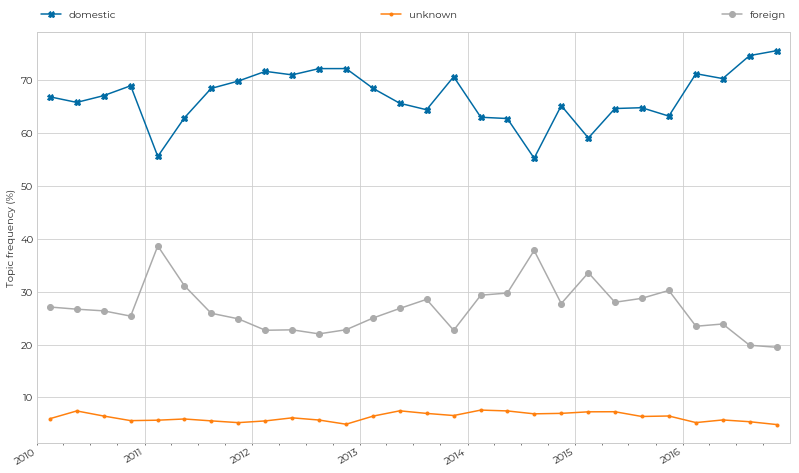

In [546]:
axes = df_stationwtfreqs.mean(level='quarter_begin_date').plot(y=remaining_labels, figsize=(13.5, 8.4))
configureLinePlot(axes, 'Topic frequency (%)')
plt.savefig(str(results_path/('fig_'+clas_name+'-overall-overtime-exbusiness-stationweight.pdf')), bbox_inches='tight', pad_inches=0)

In [547]:
# overall, coverage percents by category, weighted by station, excluding business stations.
df_stationwtfreqs.mean(level='quarter_begin_date').mean()

class
domestic    66.872450
foreign     26.855401
unknown      6.272149
dtype: float64

In [548]:
# same, for 2016 Q2-Q4 only
df_stationwtfreqs.mean(level='quarter_begin_date')[-3:].mean()

class
domestic    73.558770
foreign     21.097717
unknown      5.343513
dtype: float64

In [676]:
df_stationwtfreqs.drop(['ALJAZAM', 'BBC']).mean(level='quarter_begin_date').mean()

class
investigative        4.074200
noninvestigative    40.987609
opinion             54.011985
other                0.926206
dtype: float64

In [648]:
# quarterly averages for election coverage
df_stationwtfreqs.loc[:,('elections_hard', 'elections_soft')].mean(level='quarter_begin_date')

class,elections_hard,elections_soft
quarter_begin_date,,
2010-02-15,1.433229,4.014549
2010-05-16,1.119970,3.579113
2010-08-15,1.632856,4.831040
2010-11-15,2.106058,6.543659
2011-02-15,1.099488,3.047034
2011-05-16,1.533498,5.633966
2011-08-15,1.921245,5.713565
2011-11-15,2.402559,10.449248
2012-02-15,3.316971,15.325604


### Reproduce above bar charts using new dataframe
But now we can easily add back in the elections to us_foreign

In [549]:
df_station_sums = df.sum(level='network')
df_station_sums.head()

class,domestic,foreign,unknown
network,,,
ABC,370838.254841,93014.659853,38739.111866
ALJAZAM,613492.906309,764120.886003,75739.953298
BBC,38249.863781,99330.324496,6864.269137
BLOOMBERG,758100.874968,416929.080642,99431.664006
CBS,286594.500106,87806.949412,23896.877067


In [550]:
df_station_totals = df_station_sums.sum(axis=1)
df_station_totals

network
ABC          5.025920e+05
ALJAZAM      1.453354e+06
BBC          1.444445e+05
BLOOMBERG    1.274462e+06
CBS          3.982983e+05
CNBC         1.722931e+06
CNN          4.082362e+06
FBC          1.383987e+06
FOXNEWS      4.464024e+06
MSNBC        3.930029e+06
NBC          4.978086e+05
NPR          4.145504e+05
PBS          7.603306e+05
dtype: float64

In [552]:
df_station_freqs = df_station_sums.copy()
for label in df_station_freqs.columns:
    df_station_freqs[label] /= df_station_totals
df_station_freqs = df_station_freqs * 100.0
df_station_freqs

class,domestic,foreign,unknown
network,,,
ABC,73.785145,18.506991,7.707864
ALJAZAM,42.212222,52.576387,5.211391
BBC,26.480673,68.767142,4.752186
BLOOMBERG,59.484010,32.714134,7.801856
CBS,71.954734,22.045523,5.999743
CNBC,75.107400,15.775386,9.117214
CNN,69.381782,23.820967,6.797251
FBC,79.534977,13.932240,6.532784
FOXNEWS,77.040124,17.164948,5.794928


In [442]:
# write summary table for possible inclusion in paper
label_table = df_station_freqs.sort_index()
with open(str(results_path/('tbl_'+clas_name+'-by_station.tex')), 'w') as f:
    label_table.to_latex(f, float_format=lambda x: '%0.2f' % x)

In [555]:
clas_name

'label_usforeign'

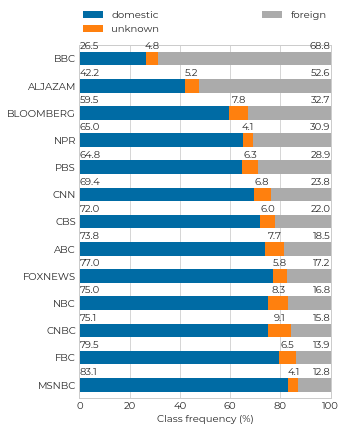

In [561]:
figsize = (4.5,6.5)
ncols = 2
xlab = "Class frequency (%)"
if clas_name == 'label_category':
    figsize = (13.5, 8.4)
    ncols = 4
    xlab = "Topic frequency (%)"

df_station_freqs = df_station_freqs.sort_values('foreign', ascending=True)
ax = df_station_freqs.plot.barh(stacked=True, y=remaining_labels, figsize=figsize)

addLabels_barh(ax, nbars=len(sums.index), formatstr='{:.1f}')
ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=ncols) # above
ax.set(xlabel='Topic frequency (%)')
ax.set(xlabel=xlab, ylabel='')
ax.set_xlim(right=100.0)
plt.savefig(str(results_path/('fig_'+clas_name+'-barh.pdf')), bbox_inches='tight', pad_inches=0)

## Per-topic time series (by network) (incl. election coverage)

In [486]:
# make a dataframe with overall frequencies per topic/station/quarter
df_freqs = df.copy()
totals = df.sum(axis=1)
totals[totals<1000] = np.nan #exclude station-quarters with too little data
for col in df_freqs.columns:
    df_freqs[col] /= totals

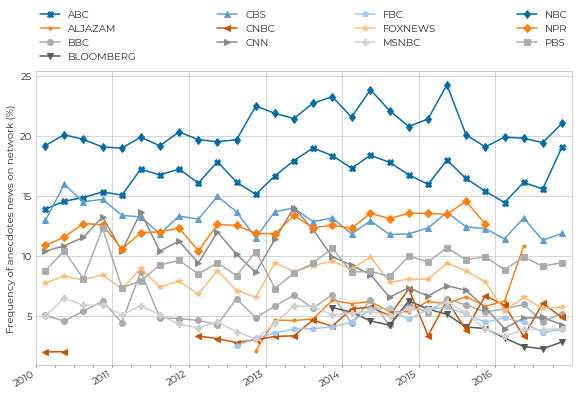

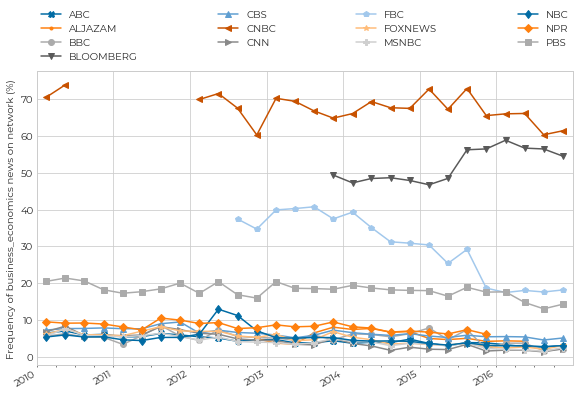

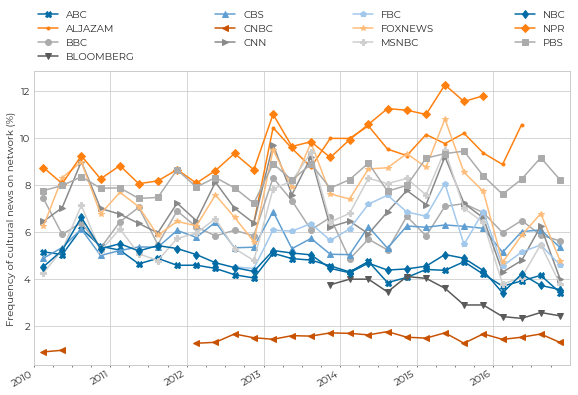

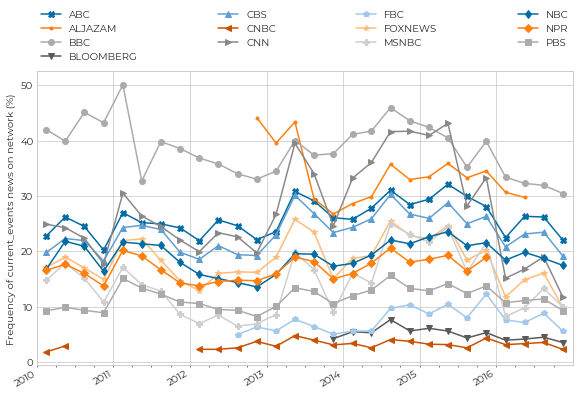

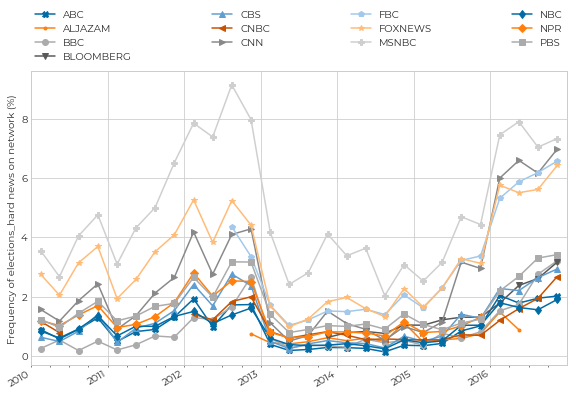

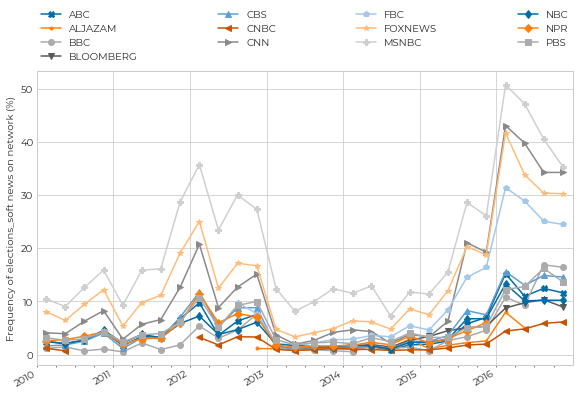

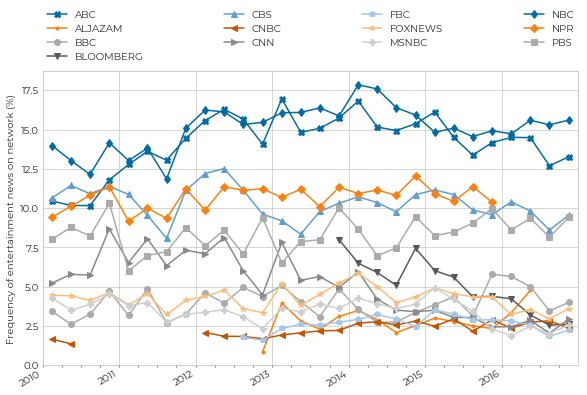

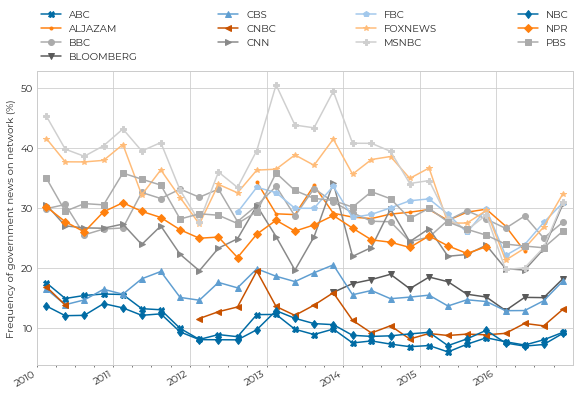

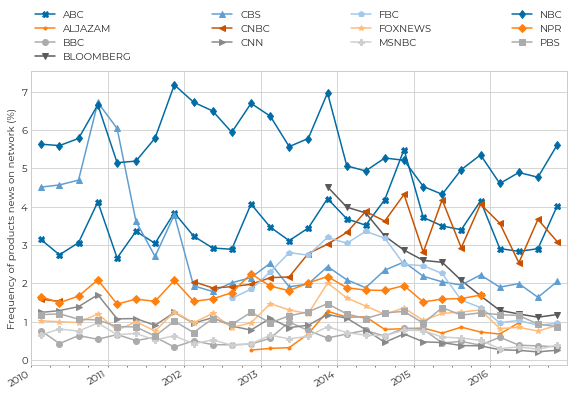

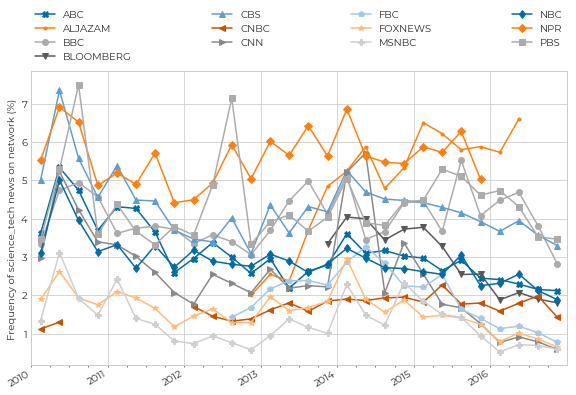

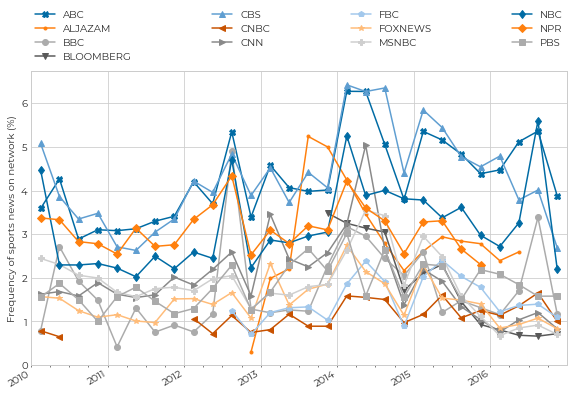

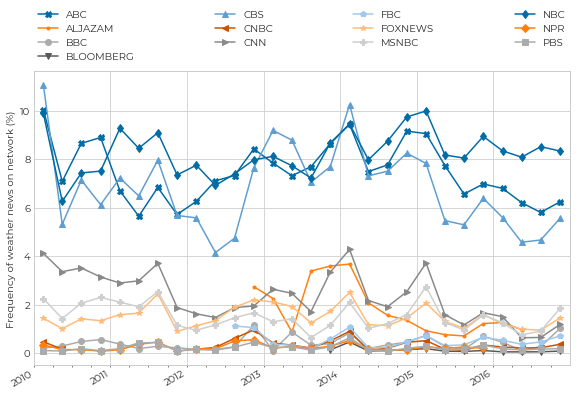

In [492]:
for label in df_freqs.columns: #['elections_hard','elections_soft']:
    axes = (df_freqs[label].unstack(level=0) * 100.0).plot(figsize=(9.6,6))
    configureLinePlot(axes, 'Frequency of ' + label + " news on network (%)")
    plt.savefig(str(results_path/('fig_'+label+'-bystation-overtime.pdf')), bbox_inches='tight', pad_inches=0)

In [388]:
df_freqs.head()

class                        investigative  noninvestigative   opinion     other
network quarter_begin_date                                                      
ABC     2010-02-15 00:00:00       0.043545          0.551596  0.397858  0.007001
        2010-05-16 00:00:00       0.034637          0.598426  0.358077  0.008861
        2010-08-15 00:00:00       0.034968          0.575823  0.379837  0.009373
        2010-11-15 00:00:00       0.031684          0.553182  0.407726  0.007408
        2011-02-15 00:00:00       0.056288          0.595956  0.341367  0.006389

## Hard-soft analysis

In [131]:
hard = df.loc[:,('elections_hard', 'business_economics', 'science_tech', 'government', 'current_events', 'cultural')].sum(axis=1)
soft = df.loc[:,('elections_soft', 'entertainment', 'sports', 'weather', 'products', 'anecdotes')].sum(axis=1)

In [132]:
df_hardsoft = pd.DataFrame([hard, soft], index=['hard', 'soft']).transpose()

In [133]:
df_hardsoft['total'] = df_hardsoft.sum(axis=1)
df_hardsoft['total'][df_hardsoft['total']<1000] = np.nan #exclude station-quarters with too little data
hard_freqs = df_hardsoft['hard'] / df_hardsoft['total']

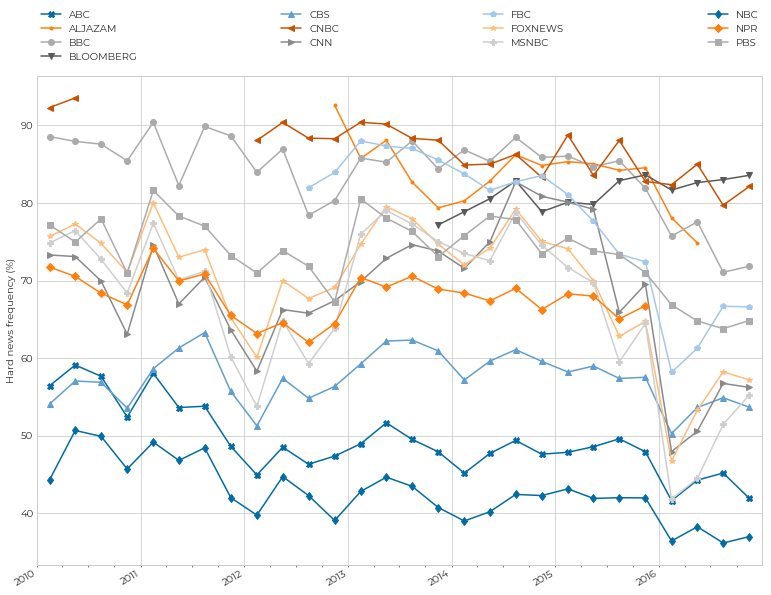

In [392]:
# plot hard news frequency by station
axes = (hard_freqs.unstack().transpose() * 100.0).plot()
configureLinePlot(axes, 'Hard news frequency (%)')
plt.savefig(str(results_path/('fig_'+clas_name+'-hardnews_bystation-overtime.pdf')), bbox_inches='tight', pad_inches=0)

In [135]:
df_hardsoft_stationfreq = df_hardsoft.sum(level='network')
for label in ['hard', 'soft']:
    df_hardsoft_stationfreq[label] = df_hardsoft_stationfreq[label] / df_hardsoft_stationfreq['total']
df_hardsoft_stationfreq = df_hardsoft_stationfreq.drop(columns='total')

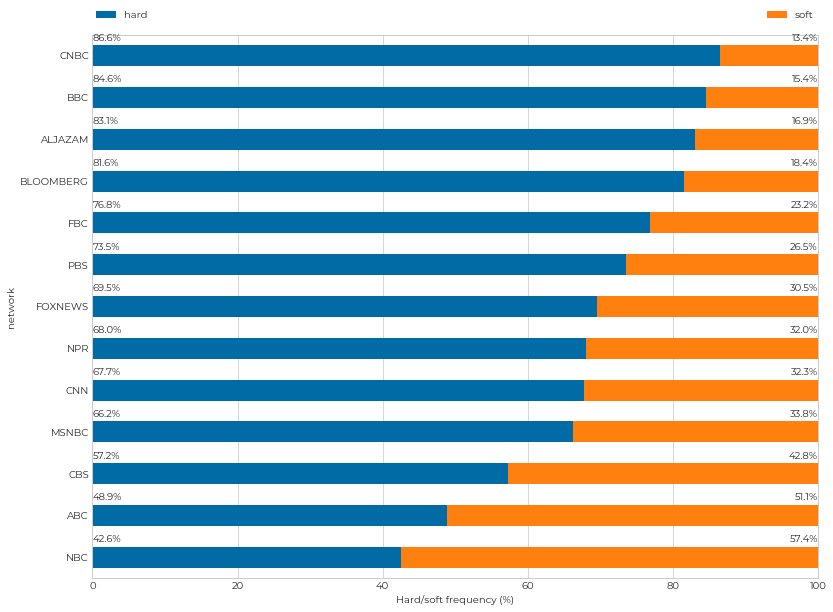

In [394]:
df_hardsoft_stationfreq = df_hardsoft_stationfreq.sort_values('hard')
axes = (df_hardsoft_stationfreq * 100.0).plot.barh(stacked=True)
addLabels_barh(axes, nbars=len(df_hardsoft_stationfreq.index))
axes.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=4) # above
axes.set(xlabel='Hard/soft frequency (%)')
axes.set_xlim(right=100.0)
plt.savefig(str(results_path/('fig_hardsoft-barh.pdf')), bbox_inches='tight', pad_inches=0)

In [444]:
# write summary table for inclusion in paper
label_table = (df_hardsoft_stationfreq * 100.0).sort_index()
with open(str(results_path/('tbl_hard_soft-by_station.tex')), 'w') as f:
    label_table.to_latex(f, float_format=lambda x: '%0.2f' % x)
df_hardsoft_stationfreq

,hard,soft
network,,
NBC,0.425804,0.574196
ABC,0.488779,0.511221
CBS,0.572475,0.427525
MSNBC,0.662372,0.337628
CNN,0.677027,0.322973
NPR,0.679982,0.320018
FOXNEWS,0.695224,0.304776
PBS,0.735494,0.264506
FBC,0.768335,0.231665


### Show possibly related series (scary, fact, foreign, current events)

In [389]:
df_fact_scary_foreign_ce = pd.DataFrame([scary_freqs, fact_freqs, foreign_freqs, current_event_freqs], index=['scary', 'fact', 'foreign', 'current events']).T

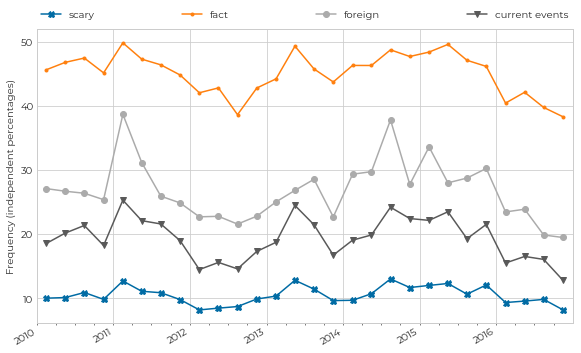

In [494]:
axes = (df_fact_scary_foreign_ce.mean(level='quarter_begin_date') * 100.0).plot()
configureLinePlot(axes, 'Frequency (independent percentages)')
plt.savefig(str(results_path/('fig_foreign_fact_curevts_scary-overall-overtime.pdf')), bbox_inches='tight', pad_inches=0)

In [ ]:
# TODO output data for regression
#df2 = df_fact_scary_foreign_ce.unstack(level=0).T
#df2.reorder_levels([1,0]).T.plot()

### TODO: Supergroups analysis?

### TODO: fact only over time

## Cross-dimension analysis

In [162]:
cross_dimension_results_path = Path('results/classification-xresults')
hard_categories = ['elections_hard', 'business_economics', 'science_tech', 'government', 'current_events', 'cultural']
cross_dimensions = ['hard_x_factinvestigative', 'hard_x_tone', 'hard_x_usforeign_among_scary']

In [485]:
this_xdim = 0
df = pd.read_csv(cross_dimension_results_path/(cross_dimensions[this_xdim]+'_stats-counts.csv'))

In [486]:
## Convert to multi-index / multi-column view

# make dates the index (row keys)
# (with an offset to the middle of the 90-day quarter)
df = df.set_index(pd.DatetimeIndex(df['quarter_begin_date']) +  pd.DateOffset(45))
df = df.drop(columns=['quarter_begin_date'])

# flip it, it's much harder to work with multi-columns than multiindexes
df = df.transpose()

# now create columns (dimensions) out of the name
df = df.reset_index()  # old index, containing names is in column 'index' now

# split name format: station-hard_topic-cross_class
new_cols = df['index'].str.split('-', expand=True)  # split the name by -
df['network'] = new_cols[0]
df['hard_topic'] = new_cols[1]
df['cross_class'] = new_cols[2]
df = df.drop(columns=['index'])

# set a multiindex based upon the names
df = df.set_index(['network', 'hard_topic', 'cross_class'])

# now, move the station index level into the multicolumn
df = df.unstack(level='network')

# put the dataframe back with stations/dates as rows, class/estimation_type as cols, and sort for display
df = df.transpose().reorder_levels([1,0]).sort_index()

In [487]:
df.head()

hard_topic                  business_economics                                           cultural                                      current_events                                      elections_hard                                         government                                       science_tech                                     
cross_class                      investigative noninvestigative opinion other total investigative noninvestigative opinion other total  investigative noninvestigative opinion other total  investigative noninvestigative opinion other total investigative noninvestigative opinion other total investigative noninvestigative opinion other total
network quarter_begin_date                                                                                                                                                                                                                                                                                                                          
ABC     2010-02-15 00:00:00                  0              924     843    18  1785            38              289     704    13  1044            520             5034     845    31  6430              0                9      20     0    29            68             1650    3008    42  4768            75              353     448    26   902
        2010-05-16 00:00:00                  2             1074     922    32  2030            29              298     798    21  1146            476             6550    1202    76  8304              0                5      13     0    18            53             1710    2600    34  4397            81              796     662    24  1563
        2010-08-15 00:00:00                  2              895     869    15  1781            37              384    1087    15  1523            463             6341    1075    85  7964              0               18      21     0    39            68             1827    2903    46  4844           100              700     620    32  1452
        2010-11-15 00:00:00                  4             1016     791    19  1830            23              349     897    11  1280            401             4896     877    54  6228              0               16      32     0    48            55             1767    2907    31  4760            73              521     460    20  1074
        2011-02-15 00:00:00                  0              706     513     7  1226            28              263     579     8   878            616             5087     866    50  6619              0                6       7     0    13            50             1362    2104    24  3540            92              483     343    19   937

In [488]:
df_station_sums = df.sum(level='network')
df_station_sums.head()

hard_topic  business_economics                                             cultural                                        current_events                                        elections_hard                                         government                                         science_tech                                       
cross_class      investigative noninvestigative opinion other   total investigative noninvestigative opinion other   total  investigative noninvestigative opinion other   total  investigative noninvestigative opinion other total investigative noninvestigative opinion other   total investigative noninvestigative opinion other   total
network                                                                                                                                                                                                                                                                                                                                       
ABC                         35            22085   17375   417   39912           675             8771   20457   364   30267          15134           222493   28010  1769  267406              0              267     527     2   796          1362            36138   50532   780   88812          1655            13538   11710   510   27413
ALJAZAM                    337            48770   56285  1078  106470          7899            30840  102475  2112  143326         179185           313860   84106  3285  580436              0              376     891     1  1268         35656           170701  300528  4449  511334          8134            43260   45237  5608  102239
BBC                         17             5081    4229    36    9363           414             1648    4897    52    7011          20006            40841    9579   233   70659              0               38      80     1   119          2469            16116   28599   206   47390           772             3371    2763    87    6993
BLOOMBERG                  106           380941  437148  5133  823328           225             2024   34539   906   37694           5920            32002   18720   708   57350              0              705    2033    12  2750          1663            48263  193746  2736  246408           957             6365   29692  1729   38743
CBS                         58            22511   19733   441   42743           653             7493   19642   390   28178          14779           122753   19636  1133  158301              0              288     617     0   905          2098            39907   62322   934  105261          1927            12285   13548   630   28390

### hard x foreign/domestic among scary snippets

run with this input here...

NOTE that anything using the 'overall' network is snippet- rather than station-weighted. Thus it overweights the cable networks

cross_class
domestic    604396.152769
foreign     555811.216832
unknown     137093.630676
Name: overall, dtype: float64


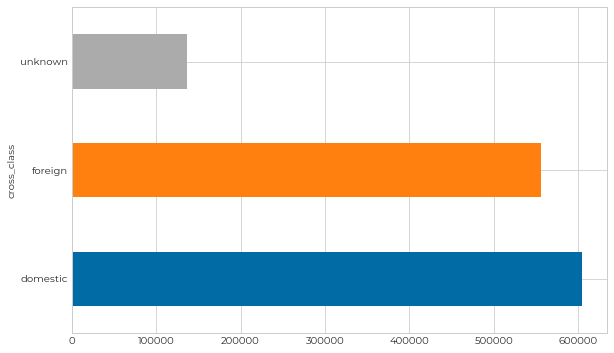

In [171]:
a = df_station_sums.loc['overall']['current_events'].drop('total')
print(a)
a.plot.barh()

cross_class
domestic    635004.177207
foreign     591140.011722
unknown     147500.811344
Name: overall, dtype: float64


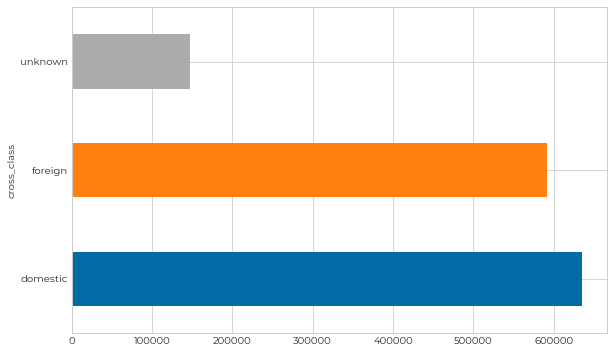

In [172]:
a = df_station_sums.loc['overall'].sum(level='cross_class').drop('total')
print(a)
a.plot.barh()

hard_topic
business_economics    2.288000e+03
cultural              5.545000e+04
current_events        2.594602e+06
elections_hard        1.000000e+01
government            7.577000e+04
science_tech          1.917000e+04
Name: overall, dtype: float64


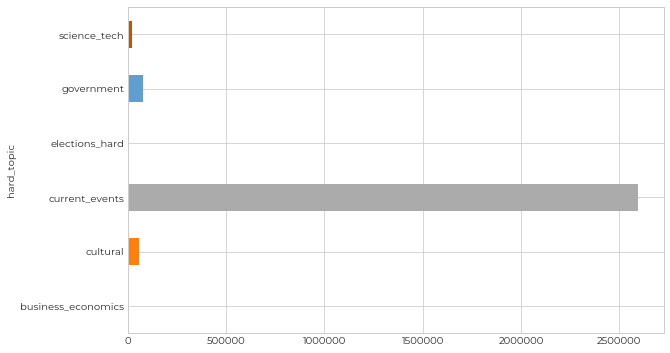

In [344]:
a=df_station_sums.loc['overall'].sum(level='hard_topic')
print(a)
a.plot.barh()

In [341]:
a/a.sum()

hard_topic
business_economics    0.000833
cultural              0.020184
current_events        0.944422
elections_hard        0.000004
government            0.027580
science_tech          0.006978
Name: overall, dtype: float64

So almost all scary content (overall, and weighted by our station-snippet mix) is current events coverage. And this is split almost evenly between foreign and domestic with slightly more domestic.

In [156]:
df_station_sums

hard_topic  business_economics                                           cultural                                         current_events                                             elections_hard                             government                                         science_tech                                       
cross_class           domestic     foreign        total     unknown      domestic      foreign         total      unknown       domestic        foreign         total        unknown       domestic   foreign total   unknown     domestic       foreign         total     unknown     domestic      foreign        total      unknown
network                                                                                                                                                                                                                                                                                                                               
ABC                  56.111364    5.492706    77.000001   15.395930    572.623515    71.782668    789.000000   144.593818   63967.440339   23732.260738  1.018010e+05   14101.298933       0.000000  0.000000   0.0  0.000000   242.690562    704.806653    967.000000   19.502784   362.674757    80.237105   766.999998   324.088135
ALJAZAM             105.548349   28.059842   157.000001   23.391809   2997.598350  1154.582490   4961.999995   809.819155   43413.568248  156661.699051  2.099920e+05    9916.732844       0.059485  0.940515   1.0  0.000000   957.944377   6365.111125   7500.000009  176.944507   697.782915   441.957942  2094.999997   955.259140
BBC                   4.578392    6.314317    12.000000    1.107292     66.615233    58.991585    148.000000    22.393182    3566.226428   18742.928246  2.369000e+04    1380.845331       0.000000  0.000000   0.0  0.000000    21.897079    382.735419    411.000001    6.367504    35.603366    34.559792   110.000000    39.836842
BLOOMBERG            24.115096   19.938694    49.999999    5.946209     99.512741    31.686997    164.000002    32.800263    2420.828677    6805.368586  9.874000e+03     647.802737       0.000000  0.000000   0.0  0.000000    53.508070    458.817466    522.000001    9.674465    28.150103    40.108171   130.999999    62.741724
CBS                  52.627599    5.905449    71.000000   12.466952    509.942379    96.984059    708.000000   101.073561   31433.355308   19117.249103  5.573500e+04    5184.395612       0.995094  0.000000   1.0  0.004906   273.057087    901.740477   1199.000001   24.202437   263.113249   100.976301   599.999999   235.910449
CNBC                 54.159121   10.215035    78.000000   13.625844     87.454508    18.944181    133.000001    26.601311    3238.349583    3791.843480  7.895000e+03     864.806942       0.000000  0.000000   0.0  0.000000    58.897835    226.113714    295.000000    9.988451    77.772647    22.223681   176.000002    76.003674
CNN                 110.807258   16.457390   151.000000   23.735352   4043.838477   805.448872   5940.999993  1091.712645  175992.972741  140708.689550  3.609640e+05   44262.337734       0.978619  0.893836   2.0  0.127544  1370.093724   5716.022557   7270.000004  183.883722   682.289766   256.045561  1910.999997   972.664671
FBC                  79.246901   10.823028   121.999998   31.930070   1045.848518   214.286083   1526.999997   266.865396    9203.347965    7735.836368  1.920200e+04    2262.815671       0.000000  0.000000   0.0  0.000000   468.456242   1112.105032   1643.999996   63.438723   149.499848    50.055196   343.999999   144.444955
FOXNEWS             183.504169   20.284224   246.999999   43.211606   5289.960557  1021.116855   7808.000002  1496.922590  138627.903938   87398.017815  2.570180e+05   30992.078312       0.000000  0.000000   0.0  0.000000  2304.386180   7341.595620   9938.999997  293.018197   531.712358   157.547156  1337.000002   647.740487
MSNBC                53.591751    3.552259    70.000000   12.855989   2444.3

In [181]:
#df_stationwtfreqs = df_station_sums.copy()
#for topic in hard_categories:
topic_stationfreqs = df_station_sums['current_events'].copy()
#df_stationwtfreqs.drop('overall')
for label in ['domestic', 'foreign', 'unknown']:
    topic_stationfreqs.loc[:,label] /= topic_stationfreqs.loc[:,'total']
topic_stationfreqs = topic_stationfreqs.drop('total', axis=1)
topic_stationfreqs = topic_stationfreqs * 100.0
print(topic_stationfreqs)

cross_class   domestic    foreign    unknown
network                                     
ABC          62.835768  23.312404  13.851828
ALJAZAM      20.673915  74.603651   4.722434
BBC          15.053721  79.117468   5.828811
BLOOMBERG    24.517204  68.922104   6.560692
CBS          56.397874  34.300259   9.301867
CNBC         41.017727  48.028416  10.953856
CNN          48.756378  38.981364  12.262258
FBC          47.929111  40.286618  11.784271
FOXNEWS      53.937041  34.004629  12.058330
MSNBC        55.152847  33.454000  11.393152
NBC          63.934556  22.650184  13.415260
NPR          35.333410  58.522898   6.143691
PBS          26.353347  67.475736   6.170917
overall      46.588737  42.843659  10.567604


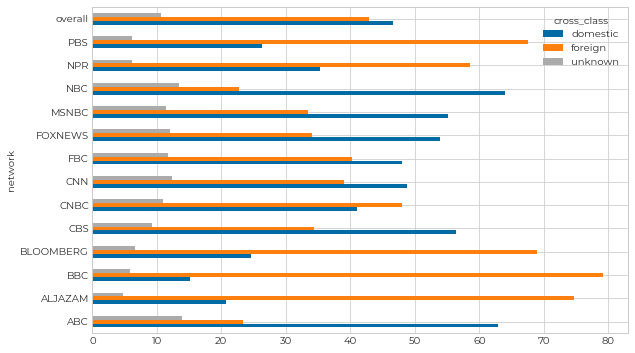

In [182]:
topic_stationfreqs.plot.barh()

So the percent of scary current affairs coverage that is domestic/foreign varies a lot between stations. But this may reflect their coverage of foreign/domestic more generally. Should compare against this base level.

In [199]:
df_station_sums = df_station_sums.drop('total', axis=1, level='cross_class')

In [211]:
station_totals = df_station_sums.sum(axis=1)

In [212]:
(df_station_sums.div(station_totals, axis=0)*100).mean()

hard_topic          cross_class
business_economics  domestic        0.128805
                    foreign         0.032760
                    unknown         0.035065
cultural            domestic        1.400899
                    foreign         0.377171
                    unknown         0.362638
current_events      domestic       40.026605
                    foreign        44.293223
                    unknown         9.021619
elections_hard      domestic        0.000200
                    foreign         0.000056
                    unknown         0.000015
government          domestic        0.627051
                    foreign         2.594718
                    unknown         0.086333
science_tech        domestic        0.406177
                    foreign         0.175248
                    unknown         0.431415
dtype: float64

In [343]:
#station-weighted percents
overall = df.sum(level='network').drop('overall').drop('total', level='cross_class', axis=1).astype(float)
for topic in hard_categories:
    topic_tot = overall[topic].sum(axis=1)
    overall[topic] = overall[topic].div(topic_tot, axis=0)

scary_geo_overall = overall.mean() * 100.
print(scary_geo_overall)

hard_topic          cross_class
business_economics  domestic       67.078041
                    foreign        15.852669
                    unknown        17.069290
cultural            domestic       64.645873
                    foreign        18.152362
                    unknown        17.201766
current_events      domestic       42.453300
                    foreign        47.973826
                    unknown         9.572874
elections_hard      domestic       58.883971
                    foreign        34.685821
                    unknown         6.430207
government          domestic       18.740855
                    foreign        78.828929
                    unknown         2.430216
science_tech        domestic       39.057220
                    foreign        17.445949
                    unknown        43.496831
dtype: float64


In [481]:
# get overall cross_class prevalence over all hard topics (averaged over stations)
overall_anytopic = df.sum(level='network').drop('overall').drop('total', level='cross_class', axis=1).astype(float).sum(axis=1, level='cross_class')
overall_topic_tot = overall_anytopic.sum(axis=1)
b=overall_anytopic.div(overall_topic_tot, axis=0).mean()*100.
b

cross_class
domestic    42.309896
foreign     47.814620
unknown      9.875484
dtype: float64

In [482]:
vals = [['all_hard'], b.index.tolist()]
idx = pd.MultiIndex.from_product(vals, names=['hard_topic', 'cross_class'])
all_topic_series = pd.Series(b.tolist(), index=idx)
all_topic_series

hard_topic  cross_class
all_hard    domestic       42.309896
            foreign        47.814620
            unknown         9.875484
dtype: float64

In [483]:
scary_geo_overall = pd.concat((scary_geo_overall, all_topic_series))

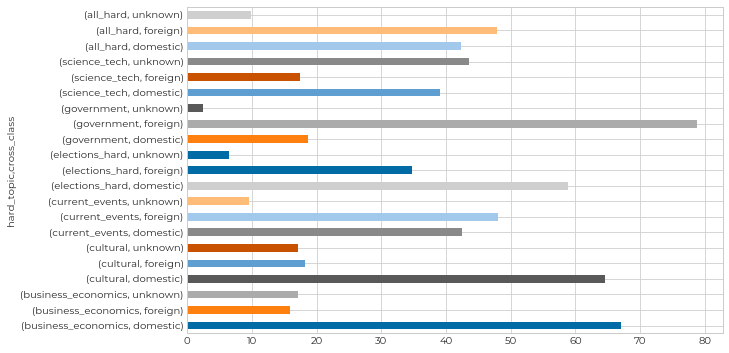

In [484]:
scary_geo_overall.plot.barh()

### Hard x tone

rerun with this input here

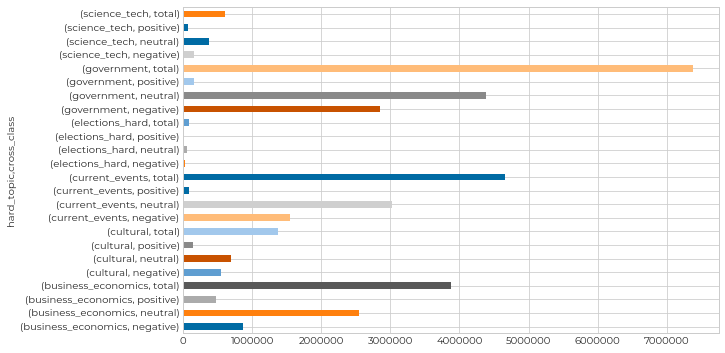

In [219]:
df_station_sums.loc['overall'].plot.barh()

In [220]:
df_station_sums2 = df_station_sums.drop('total', axis=1, level='cross_class')

In [229]:
station_totals = df_station_sums2.sum(axis=1)
station_freqs = (df_station_sums2.div(station_totals, axis=0)*100)

In [230]:
station_freqs.mean()

hard_topic          cross_class
business_economics  negative        4.900776
                    neutral        14.885728
                    positive        2.872656
cultural            negative        2.742900
                    neutral         3.865160
                    positive        0.885461
current_events      negative        9.603347
                    neutral        19.015664
                    positive        0.622323
elections_hard      negative        0.117708
                    neutral         0.227131
                    positive        0.011625
government          negative       13.025196
                    neutral        21.812020
                    positive        0.756240
science_tech        negative        1.191094
                    neutral         2.855369
                    positive        0.609600
dtype: float64

cross_class
negative    33.250581
neutral     61.520223
positive     5.229196
Name: overall, dtype: float64


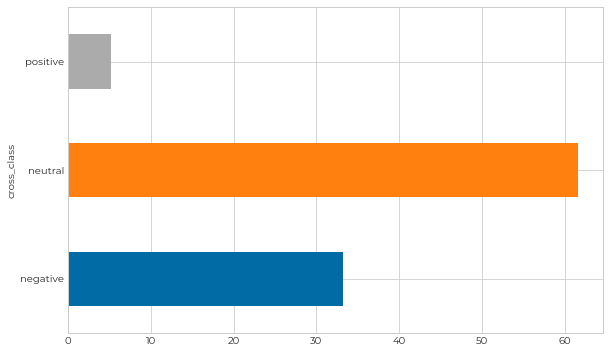

In [233]:
a = station_freqs.loc['overall'].sum(level='cross_class')
print(a)
a.plot.barh()

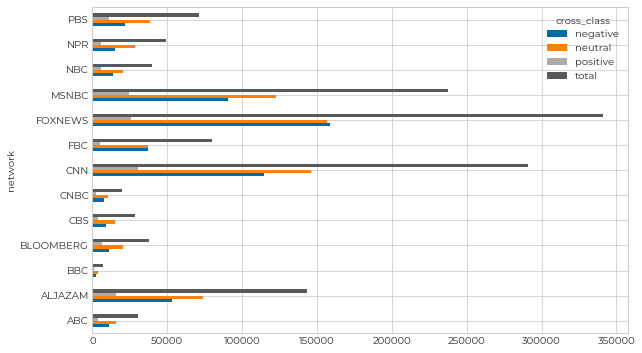

In [126]:
df.sum(level='network').drop('overall')['cultural'].plot.barh()

cross_class  negative   neutral  positive
network                                  
ABC          0.328848  0.645948  0.025205
ALJAZAM      0.334151  0.647439  0.018410
BBC          0.307357  0.675061  0.017582
BLOOMBERG    0.331299  0.637278  0.031423
CBS          0.329091  0.646316  0.024593
CNBC         0.388244  0.587153  0.024603
CNN          0.357481  0.620081  0.022438
FBC          0.454272  0.528735  0.016993
FOXNEWS      0.426991  0.556295  0.016714
MSNBC        0.386569  0.592516  0.020915
NBC          0.344516  0.626874  0.028610
NPR          0.317754  0.665951  0.016295
PBS          0.344924  0.627991  0.027085


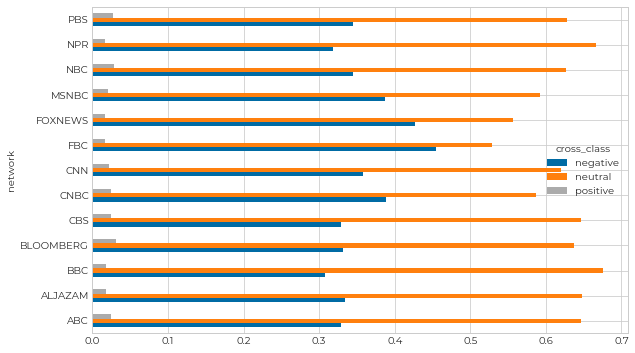

In [349]:
# percents pos/neg/neutral among government
df2 = df.sum(level='network').drop('overall')['government']
df_stationfreq = df2.sum(level='network')
for label in ['negative', 'neutral', 'positive']:
    df_stationfreq.loc[:,label] = df_stationfreq.loc[:,label] / df_stationfreq.loc[:,'total']
df_stationfreq = df_stationfreq.drop(columns='total')
print(df_stationfreq)
df_stationfreq.plot.barh()

cross_class  negative   neutral  positive
network                                  
ABC          0.362806  0.512429  0.124765
ALJAZAM      0.372247  0.517168  0.110585
BBC          0.337675  0.522733  0.139592
BLOOMBERG    0.290886  0.534561  0.174553
CBS          0.332477  0.524810  0.142713
CNBC         0.371247  0.503681  0.125072
CNN          0.394391  0.501464  0.104145
FBC          0.469060  0.463928  0.067012
FOXNEWS      0.465380  0.459192  0.075428
MSNBC        0.380263  0.515950  0.103787
NBC          0.337989  0.512197  0.149814
NPR          0.303094  0.580989  0.115918
PBS          0.303966  0.537866  0.158168


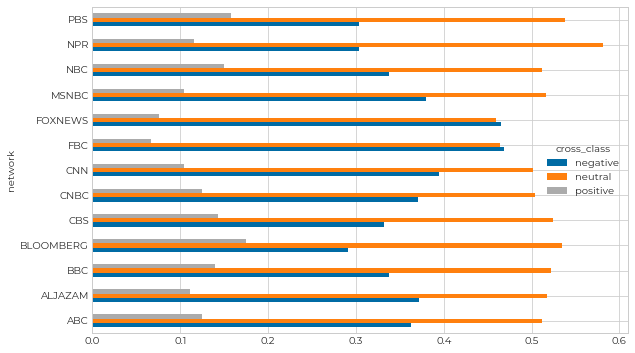

In [350]:
# percents pos/neg/neutral among cultural
df2 = df.sum(level='network').drop('overall')['cultural']
df_stationfreq = df2.sum(level='network')
for label in ['negative', 'neutral', 'positive']:
    df_stationfreq.loc[:,label] = df_stationfreq.loc[:,label] / df_stationfreq.loc[:,'total']
df_stationfreq = df_stationfreq.drop(columns='total')
print(df_stationfreq)
df_stationfreq.plot.barh()

cross_class  negative   neutral  positive
network                                  
ABC          0.332963  0.641778  0.025259
ALJAZAM      0.353132  0.632150  0.014718
BBC          0.323774  0.657713  0.018513
BLOOMBERG    0.298847  0.683622  0.017531
CBS          0.310513  0.663709  0.025778
CNBC         0.329127  0.654445  0.016429
CNN          0.323858  0.657370  0.018772
FBC          0.383501  0.602362  0.014137
FOXNEWS      0.344421  0.636908  0.018671
MSNBC        0.311274  0.668960  0.019766
NBC          0.329334  0.642921  0.027744
NPR          0.305646  0.673138  0.021216
PBS          0.326946  0.651427  0.021627


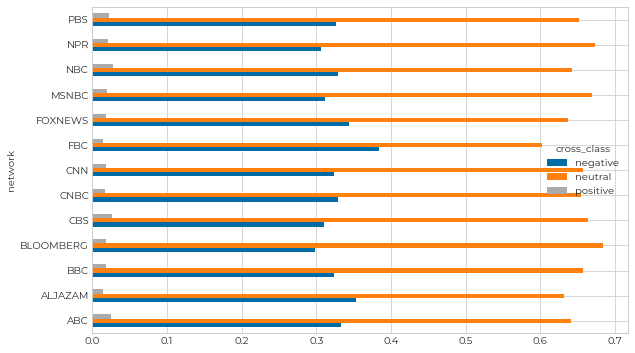

In [351]:
# percents pos/neg/neutral among current_events
df2 = df.sum(level='network').drop('overall')['current_events']
df_stationfreq = df2.sum(level='network')
for label in ['negative', 'neutral', 'positive']:
    df_stationfreq.loc[:,label] = df_stationfreq.loc[:,label] / df_stationfreq.loc[:,'total']
df_stationfreq = df_stationfreq.drop(columns='total')
print(df_stationfreq)
df_stationfreq.plot.barh()

cross_class  negative   neutral  positive
network                                  
ABC          0.228075  0.594126  0.177799
ALJAZAM      0.279912  0.622816  0.097272
BBC          0.253396  0.647853  0.098751
BLOOMBERG    0.184444  0.690409  0.125147
CBS          0.228277  0.620591  0.151133
CNBC         0.193298  0.673853  0.132849
CNN          0.264267  0.631252  0.104481
FBC          0.247392  0.633941  0.118667
FOXNEWS      0.351442  0.568943  0.079615
MSNBC        0.265619  0.607741  0.126640
NBC          0.205909  0.609889  0.184202
NPR          0.251752  0.643183  0.105064
PBS          0.203875  0.676720  0.119405


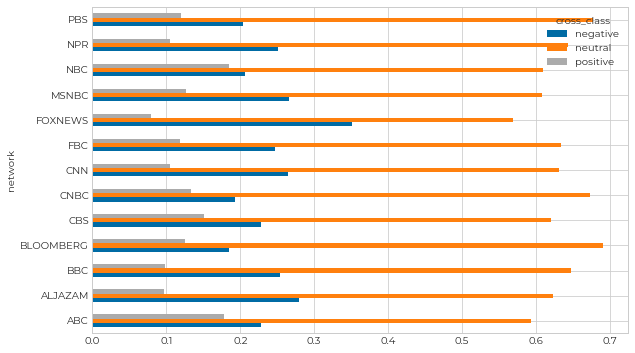

In [352]:
# percents pos/neg/neutral among cultural
df2 = df.sum(level='network').drop('overall')['business_economics']
df_stationfreq = df2.sum(level='network')
for label in ['negative', 'neutral', 'positive']:
    df_stationfreq.loc[:,label] = df_stationfreq.loc[:,label] / df_stationfreq.loc[:,'total']
df_stationfreq = df_stationfreq.drop(columns='total')
print(df_stationfreq)
df_stationfreq.plot.barh()

In [379]:
overall = df.sum(level='network').drop('overall').drop('total', level='cross_class', axis=1).astype(float)
for topic in hard_categories:
    topic_tot = overall[topic].sum(axis=1)
    overall[topic] = overall[topic].div(topic_tot, axis=0)

tone_overall = overall.mean() * 100.
print(tone_overall)

hard_topic          cross_class
business_economics  negative       24.289680
                    neutral        63.240896
                    positive       12.469424
cultural            negative       36.319079
                    neutral        51.438221
                    positive       12.242700
current_events      negative       32.871813
                    neutral        65.126941
                    positive        2.001245
elections_hard      negative       31.947218
                    neutral        64.582657
                    positive        3.470125
government          negative       35.780741
                    neutral        61.981824
                    positive        2.237435
science_tech        negative       25.475869
                    neutral        61.151814
                    positive       13.372317
dtype: float64


In [464]:
# get overall cross_class prevalence over all hard topics (averaged over stations)
overall_anytopic = df.sum(level='network').drop('overall').drop('total', level='cross_class', axis=1).astype(float).sum(axis=1, level='cross_class')
overall_topic_tot = overall_anytopic.sum(axis=1)
b=overall_anytopic.div(overall_topic_tot, axis=0).mean()*100.
b

cross_class
negative    31.452593
neutral     62.748830
positive     5.798577
dtype: float64

In [465]:
#tuples = list(zip(*[['all_hard']*3, b.index.tolist()]))
#pd.MultiIndex.from_tuples(tuples, names=['hard_topic', 'cross_class'])

In [473]:
vals = [['all_hard'], b.index.tolist()]
idx = pd.MultiIndex.from_product(vals, names=['hard_topic', 'cross_class'])
all_topic_series = pd.Series(b.tolist(), index=idx)
all_topic_series

hard_topic  cross_class
all_hard    negative       31.452593
            neutral        62.748830
            positive        5.798577
dtype: float64

In [475]:
tone_overall = pd.concat((tone_overall, all_topic_series))

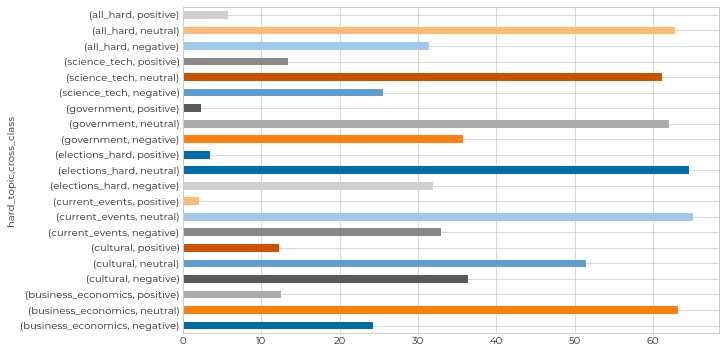

In [476]:
tone_overall.plot.barh()

### hard x fact/investigative/opinion

rerun with new inputs here

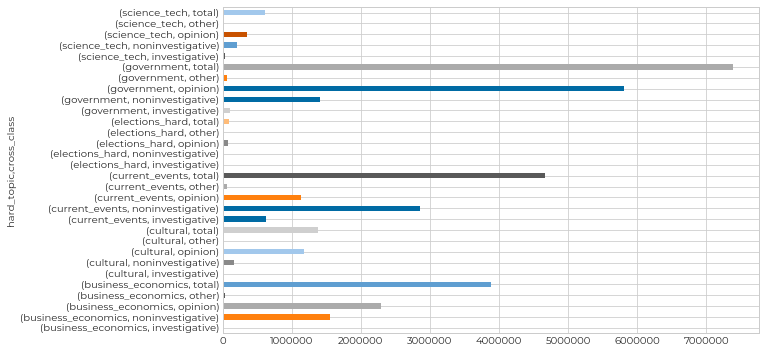

In [241]:
df_station_sums.loc['overall'].plot.barh()

In [242]:
df_station_sums2 = df_station_sums.drop('total', axis=1, level='cross_class')

In [243]:
station_totals = df_station_sums2.sum(axis=1)
station_freqs = (df_station_sums2.div(station_totals, axis=0)*100)

In [244]:
station_freqs.mean()

hard_topic          cross_class     
business_economics  investigative        0.010969
                    noninvestigative     9.651030
                    opinion             12.821769
                    other                0.175391
cultural            investigative        0.180839
                    noninvestigative     1.307741
                    opinion              5.898621
                    other                0.106320
current_events      investigative        4.237183
                    noninvestigative    19.240161
                    opinion              5.475660
                    other                0.288331
elections_hard      investigative        0.000005
                    noninvestigative     0.071918
                    opinion              0.284162
                    other                0.000380
government          investigative        0.750731
                    noninvestigative     8.346598
                    opinion             26.173539
             

cross_class
investigative        4.388258
noninvestigative    34.389493
opinion             60.181030
other                1.041219
Name: overall, dtype: float64


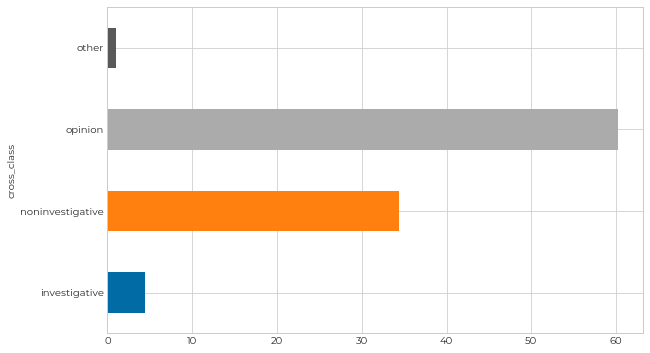

In [245]:
a = station_freqs.loc['overall'].sum(level='cross_class')
print(a)
a.plot.barh()

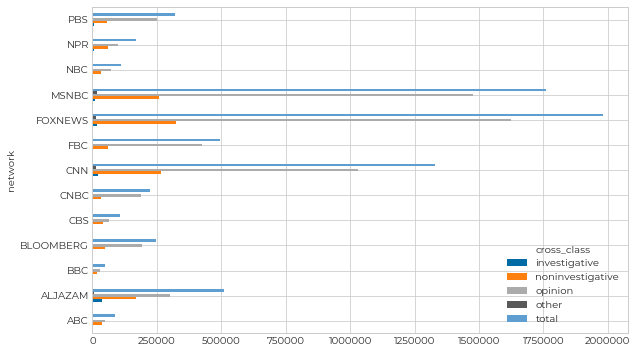

In [246]:
df.sum(level='network').drop('overall')['government'].plot.barh()

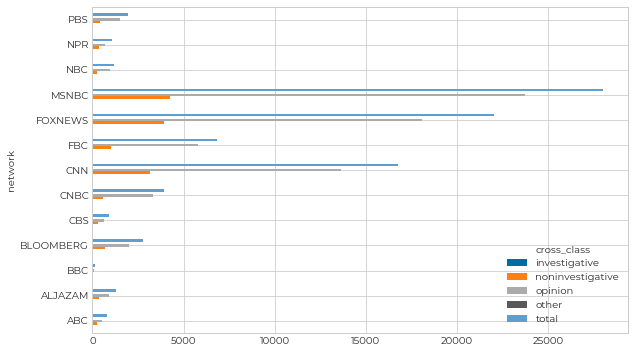

In [248]:
df.sum(level='network').drop('overall')['elections_hard'].plot.barh()

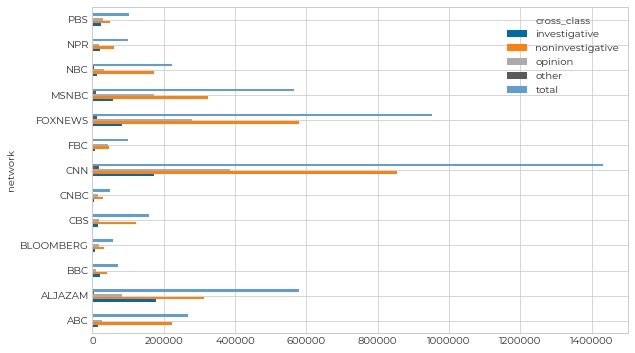

In [247]:
df.sum(level='network').drop('overall')['current_events'].plot.barh()

cross_class  investigative  noninvestigative   opinion     other
network                                                         
ABC               0.015336          0.406904  0.568977  0.008783
ALJAZAM           0.069731          0.333835  0.587733  0.008701
BBC               0.052100          0.340072  0.603482  0.004347
BLOOMBERG         0.006749          0.195866  0.786281  0.011104
CBS               0.019931          0.379124  0.592071  0.008873
CNBC              0.003332          0.146977  0.837538  0.012153
CNN               0.014792          0.199998  0.776179  0.009031
FBC               0.005086          0.122635  0.864649  0.007630
FOXNEWS           0.008941          0.163768  0.819602  0.007689
MSNBC             0.006006          0.145699  0.839105  0.009190
NBC               0.012357          0.302098  0.674508  0.011037
NPR               0.042090          0.360006  0.588090  0.009814
PBS               0.021422          0.182098  0.783909  0.012571


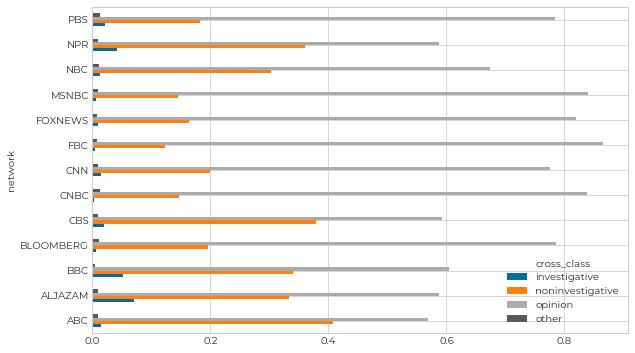

In [270]:
# percents fact/investigative among government
df2 = df.sum(level='network').drop('overall')['government']
df_stationfreq = df2.sum(level='network')
for label in ['investigative', 'noninvestigative', 'opinion', 'other']:
    df_stationfreq.loc[:,label] = df_stationfreq.loc[:,label] / df_stationfreq.loc[:,'total']
df_stationfreq = df_stationfreq.drop(columns='total')
print(df_stationfreq)
df_stationfreq.plot.barh()

cross_class  investigative  noninvestigative   opinion     other
network                                                         
ABC               0.000000          0.335427  0.662060  0.002513
ALJAZAM           0.000000          0.296530  0.702681  0.000789
BBC               0.000000          0.319328  0.672269  0.008403
BLOOMBERG         0.000000          0.256364  0.739273  0.004364
CBS               0.000000          0.318232  0.681768  0.000000
CNBC              0.000000          0.150598  0.848893  0.000509
CNN               0.000000          0.186923  0.812124  0.000954
FBC               0.000000          0.151724  0.847249  0.001027
FOXNEWS           0.000045          0.179334  0.820122  0.000499
MSNBC             0.000036          0.151772  0.847657  0.000536
NBC               0.000000          0.206751  0.791561  0.001688
NPR               0.000000          0.326686  0.673314  0.000000
PBS               0.000000          0.220588  0.778398  0.001014


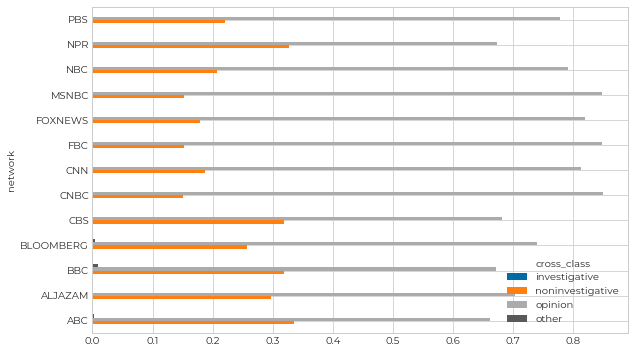

In [269]:
# percents fact/investigative among government
df2 = df.sum(level='network').drop('overall')['elections_hard']
df_stationfreq = df2.sum(level='network')
for label in ['investigative', 'noninvestigative', 'opinion', 'other']:
    df_stationfreq.loc[:,label] = df_stationfreq.loc[:,label] / df_stationfreq.loc[:,'total']
df_stationfreq = df_stationfreq.drop(columns='total')
print(df_stationfreq)
df_stationfreq.plot.barh()

cross_class  investigative  noninvestigative   opinion     other
network                                                         
ABC               0.056596          0.832042  0.104747  0.006615
ALJAZAM           0.308708          0.540731  0.144901  0.005660
BBC               0.283134          0.578001  0.135567  0.003298
BLOOMBERG         0.103226          0.558012  0.326417  0.012345
CBS               0.093360          0.775440  0.124042  0.007157
CNBC              0.073039          0.575229  0.335712  0.016019
CNN               0.121050          0.596581  0.269743  0.012626
FBC               0.081461          0.476303  0.428160  0.014075
FOXNEWS           0.087422          0.607960  0.292560  0.012058
MSNBC             0.104393          0.572613  0.306756  0.016239
NBC               0.060400          0.781777  0.140553  0.017269
NPR               0.206086          0.610128  0.175706  0.008080
PBS               0.225566          0.482145  0.277052  0.015237


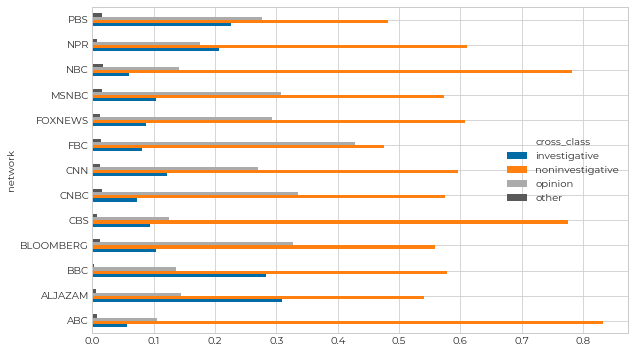

In [271]:
# percents pos/neg/neutral among current_events
df2 = df.sum(level='network').drop('overall')['current_events']
df_stationfreq = df2.sum(level='network')
for label in ['investigative', 'noninvestigative', 'opinion', 'other']:
    df_stationfreq.loc[:,label] = df_stationfreq.loc[:,label] / df_stationfreq.loc[:,'total']
df_stationfreq = df_stationfreq.drop(columns='total')
print(df_stationfreq)
df_stationfreq.plot.barh()

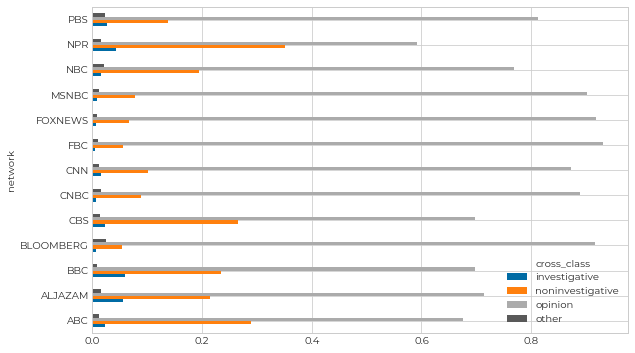

In [256]:
# percents factinvestigative among cultural
df2 = df.sum(level='network').drop('overall')['cultural']
df_stationfreq = df2.sum(level='network')
for label in ['investigative', 'noninvestigative', 'opinion', 'other']:
    df_stationfreq.loc[:,label] = df_stationfreq.loc[:,label] / df_stationfreq.loc[:,'total']
df_stationfreq = df_stationfreq.drop(columns='total')
print(df_stationfreq)
df_stationfreq.plot.barh()

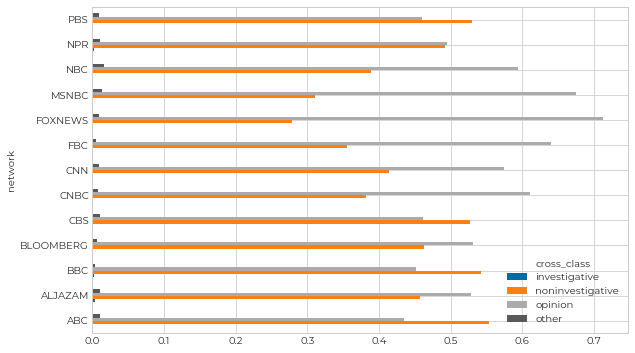

In [258]:
# percents factinvestigative among business_economics
df2 = df.sum(level='network').drop('overall')['business_economics']
df_stationfreq = df2.sum(level='network')
for label in ['investigative', 'noninvestigative', 'opinion', 'other']:
    df_stationfreq.loc[:,label] = df_stationfreq.loc[:,label] / df_stationfreq.loc[:,'total']
df_stationfreq = df_stationfreq.drop(columns='total')
print(df_stationfreq)
df_stationfreq.plot.barh()

In [302]:
df.sum(level='network')['business_economics'].drop('total', axis=1)

cross_class,investigative,noninvestigative,opinion,other
network,,,,
ABC,35,22085,17375,417
ALJAZAM,337,48770,56285,1078
BBC,17,5081,4229,36
BLOOMBERG,106,380941,437148,5133
CBS,58,22511,19733,441
CNBC,104,529234,846098,9824
CNN,166,98927,137306,2239
FBC,79,171315,308493,2409
FOXNEWS,151,76985,197161,2457


In [334]:
overall = df.sum(level='network').drop('overall').drop('total', level='cross_class', axis=1).astype(float)
for topic in hard_categories:
    topic_tot = overall[topic].sum(axis=1)
    overall[topic] = overall[topic].div(topic_tot, axis=0)

fi_overall = overall.mean() * 100.
print(fi_overall)

hard_topic          cross_class     
business_economics  investigative        0.099091
                    noninvestigative    43.802833
                    opinion             55.172097
                    other                0.925979
cultural            investigative        2.241092
                    noninvestigative    16.413136
                    opinion             79.898181
                    other                1.447591
current_events      investigative       13.880316
                    noninvestigative    61.438187
                    opinion             23.553204
                    other                1.128292
elections_hard      investigative        0.000624
                    noninvestigative    23.848117
                    opinion             75.979759
                    other                0.171500
government          investigative        2.137483
                    noninvestigative    25.223698
                    opinion             71.708641
             

In [ ]:
# This is like the above, but is snippet- rather than station- weighted
overall = df.sum(level='network').loc['overall'].astype(float)
for topic in hard_categories:
    topic_tot = overall[topic]['total']
    overall[topic] = overall[topic].div(float(topic_tot))
overall = overall.drop('total', level='cross_class')
#reorder_levels([1,0])
#fi_overall = overall * 100.
#print(fi_overall)

In [489]:
# get overall cross_class prevalence over all hard topics (averaged over stations)
overall_anytopic = df.sum(level='network').drop('overall').drop('total', level='cross_class', axis=1).astype(float).sum(axis=1, level='cross_class')
overall_topic_tot = overall_anytopic.sum(axis=1)
b=overall_anytopic.div(overall_topic_tot, axis=0).mean()*100.
b

cross_class
investigative        5.578690
noninvestigative    40.801671
opinion             52.582634
other                1.037005
dtype: float64

In [490]:
vals = [['all_hard'], b.index.tolist()]
idx = pd.MultiIndex.from_product(vals, names=['hard_topic', 'cross_class'])
all_topic_series = pd.Series(b.tolist(), index=idx)
all_topic_series

hard_topic  cross_class     
all_hard    investigative        5.578690
            noninvestigative    40.801671
            opinion             52.582634
            other                1.037005
dtype: float64

In [491]:
fi_overall = pd.concat((fi_overall, all_topic_series))

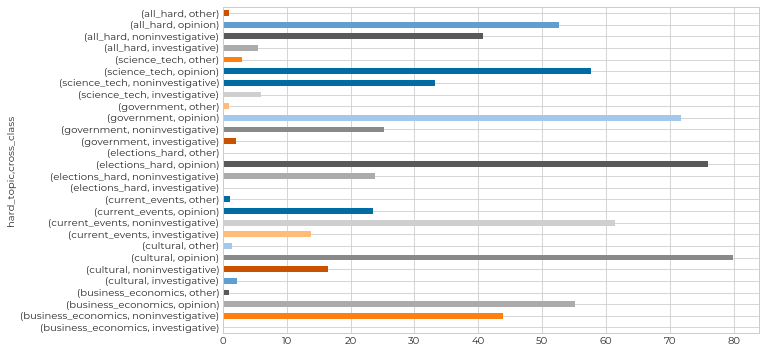

In [492]:
fi_overall.plot.barh()

In [493]:
fi_overall.unstack('cross_class')

cross_class,investigative,noninvestigative,opinion,other
hard_topic,,,,
all_hard,5.578690,40.801671,52.582634,1.037005
business_economics,0.099091,43.802833,55.172097,0.925979
cultural,2.241092,16.413136,79.898181,1.447591
current_events,13.880316,61.438187,23.553204,1.128292
elections_hard,0.000624,23.848117,75.979759,0.171500
government,2.137483,25.223698,71.708641,0.930179
science_tech,5.903859,33.305135,57.714785,3.076221


### Combine all time- and network- averaged cross-class results

In [494]:
all_xclass_sum=pd.concat((tone_overall.unstack('cross_class').T, fi_overall.unstack('cross_class').T,scary_geo_overall.unstack('cross_class').T))
print(all_xclass_sum)

hard_topic         all_hard  business_economics   cultural  current_events  elections_hard  government  science_tech
cross_class                                                                                                         
negative          31.452593           24.289680  36.319079       32.871813       31.947218   35.780741     25.475869
neutral           62.748830           63.240896  51.438221       65.126941       64.582657   61.981824     61.151814
positive           5.798577           12.469424  12.242700        2.001245        3.470125    2.237435     13.372317
investigative      5.578690            0.099091   2.241092       13.880316        0.000624    2.137483      5.903859
noninvestigative  40.801671           43.802833  16.413136       61.438187       23.848117   25.223698     33.305135
opinion           52.582634           55.172097  79.898181       23.553204       75.979759   71.708641     57.714785
other              1.037005            0.925979   1.447591      

In [495]:
with open(str(cross_dimension_results_path/('tbl_hard_cross-class.tex')), 'w') as f:
    all_xclass_sum.to_latex(f, float_format=lambda x: '%0.2f' % x)